<a href="https://colab.research.google.com/github/ULabanieh/Utrecht-Housing-Price-Predictor/blob/main/cla_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utrecht Housing Price Predictor

In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The goal of the project is to explore how well housing prices can be predicted based on property characteristics and to build a clear end-to-end machine learning pipeline, from data exploration and preprocessing to model training and evaluation.

In [2]:
# Install libraries and dependancies for project
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn
!pip install torch
!pip install present_files

ERROR: Could not find a version that satisfies the requirement present_files (from versions: none)
ERROR: No matching distribution found for present_files


In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import torch

In [4]:
# fix for scientific notation
pd.set_option("display.float_format", "{:,.0f}".format)

In [5]:
# setting random seeds for reproducibility
SEED = 42

random.seed(SEED)
np.random.seed(SEED)

In [6]:
# establishing working directory
import os
os.chdir("/content/drive/MyDrive/Final Project/data")


Importing dataset from csv

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Final Project/data/utrechthousinghuge.csv')
df

id  zipcode  lot-len  lot-width  lot-area  house-area  garden-size  \
0     100426     3528       11          5        56         112           10   
1     100871     3528       14          5        68         112            8   
2     100936     3800       17          7       111         151           44   
3     100970     3800       19          6       112         108           40   
4     101191     3800       20          6       118         108           46   
...      ...      ...      ...        ...       ...         ...          ...   
1995  993057     3525       12          8        99         142           20   
1996  993131     3500       16          8       124         135           34   
1997  993444     3525       12          6        78         146           20   
1998  993873     3525       14          8       103         137           27   
1999  993963     3500       18          8       148         184           58   

      balcony  x-coor  y-coor  buildyear  bathrooms  taxvalue  retailvalue  \
0           2    2112    5113       1932          1    494000       670000   
1           0    2355    5218       1945          1    504000       675000   
2           2    2656    5200       1946          1    692000       869000   
3           2    2856    5201       1946          1    521000       628000   
4           1    2962    5266       1950          1    526000       610000   
...       ...     ...     ...        ...        ...       ...          ...   
1995        2    2252    5752       1990          2    648000       765000   
1996        2    2650    5768       1992          1    639000       728000   
1997        2    2204    5854       2000          2    647000       733000   
1998        1    2352    5958       2015          2    629000       694000   
1999        2    2814    5954       2012          2    857000       888000   

      energy-eff  monument  
0              0         1  
1              0         1  
2              0         1  
3              0         1  
4              0         1  
...          ...       ...  
1995           1         0  
1996           0         0  
1997           1         0  
1998           1         0  
1999           1         0  

[2000 rows x 16 columns]

In [8]:
df.shape

(2000, 16)

In [9]:
df.head()

id  zipcode  lot-len  lot-width  lot-area  house-area  garden-size  \
0  100426     3528       11          5        56         112           10   
1  100871     3528       14          5        68         112            8   
2  100936     3800       17          7       111         151           44   
3  100970     3800       19          6       112         108           40   
4  101191     3800       20          6       118         108           46   

   balcony  x-coor  y-coor  buildyear  bathrooms  taxvalue  retailvalue  \
0        2    2112    5113       1932          1    494000       670000   
1        0    2355    5218       1945          1    504000       675000   
2        2    2656    5200       1946          1    692000       869000   
3        2    2856    5201       1946          1    521000       628000   
4        1    2962    5266       1950          1    526000       610000   

   energy-eff  monument  
0           0         1  
1           0         1  
2           0         1  
3           0         1  
4           0         1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2000 non-null   int64  
 1   zipcode      2000 non-null   int64  
 2   lot-len      2000 non-null   float64
 3   lot-width    2000 non-null   float64
 4   lot-area     2000 non-null   float64
 5   house-area   2000 non-null   float64
 6   garden-size  2000 non-null   float64
 7   balcony      2000 non-null   int64  
 8   x-coor       2000 non-null   int64  
 9   y-coor       2000 non-null   int64  
 10  buildyear    2000 non-null   int64  
 11  bathrooms    2000 non-null   int64  
 12  taxvalue     2000 non-null   int64  
 13  retailvalue  2000 non-null   int64  
 14  energy-eff   2000 non-null   int64  
 15  monument     2000 non-null   int64  
dtypes: float64(5), int64(11)
memory usage: 250.1 KB


In [11]:
# duplicate check
df.nunique()

id             1999
zipcode           4
lot-len          60
lot-width        61
lot-area        870
house-area      157
garden-size     652
balcony           3
x-coor          396
y-coor          398
buildyear        99
bathrooms         2
taxvalue        682
retailvalue     739
energy-eff        2
monument          2
dtype: int64

In [12]:
print(df.duplicated().sum())

0


In [13]:
print(df['id'].duplicated().sum())

1


In [14]:
df[df['id'].duplicated(keep = False)]

id  zipcode  lot-len  lot-width  lot-area  house-area  garden-size  \
947  531909     3800       15          9       137         202           47   
948  531909     3800       15          8       122         109           49   

     balcony  x-coor  y-coor  buildyear  bathrooms  taxvalue  retailvalue  \
947        2    2517    5467       1965          1    919000      1142000   
948        2    2505    5462       1969          1    535000       693000   

     energy-eff  monument  
947           0         1  
948           0         0

In [15]:
df[df.duplicated()]
# no duplicate records in this dataset

Empty DataFrame
Columns: [id, zipcode, lot-len, lot-width, lot-area, house-area, garden-size, balcony, x-coor, y-coor, buildyear, bathrooms, taxvalue, retailvalue, energy-eff, monument]
Index: []

In [16]:
df.columns

Index(['id', 'zipcode', 'lot-len', 'lot-width', 'lot-area', 'house-area',
       'garden-size', 'balcony', 'x-coor', 'y-coor', 'buildyear', 'bathrooms',
       'taxvalue', 'retailvalue', 'energy-eff', 'monument'],
      dtype='object')

In [17]:
df['garden-size'].unique()

array([ 10.5,   8. ,  44.2,  39.6,  45.6,  48.4,  68.3,  85.5,   9.3,
        68.5,  89. ,  32.4,  83.3,   6.6,  11.9,  17.4,  48.9,   8.9,
        60.7,  55.6,  51. ,  20.3,  29.7,   5.1,  21. ,  70. ,  15.8,
        56.1,  44.7,  10.1,  14.6,  29.1,  77. ,  24.7,  43.4,   8.5,
        65.5,  14.3,  75.8,  20.2,   5.7,  30.4,  46.4,  26.2,  79.2,
         9.2,  96.6,  41.4,  17.8,  40.8,  38.9,   6.2,   9.1,   7.5,
        82.1,   8.8,  10.6,  12.4,  19.2,  23.1,  20. ,  83.4,  30.6,
         7.7,  20.5,  11.1,  50.9,   5.6,  27. ,  64.3,  35.2,  31.8,
        44.8,   8.7,  99.6,  10.3,  73.6,  64. ,  29. ,  57.5,  67.7,
        69.8,  25.5,  47.1,  45.4,  36.5,   7. ,  24. ,  23.4,  23. ,
        53. ,   5.2,  24.3,  15.9,  29.2,  47.8,  60.8,  73. ,  44. ,
        79.8,  35.3,  27.5,   8.3, 108.1,  42.7,  25.7,  63.7,  19.5,
        28.1,  42.6,  34.8,  37.8,  41.8,   6.7,   6.4,  51.9,  13.1,
        74.4,   9. ,  46. ,  59.2,  45.5,   6.9,  23.8,  21.6,  39.8,
        12.8,  68. ,

In [18]:
df = df.drop(['id', 'zipcode', 'lot-len', 'lot-width'], axis = 1)
df

lot-area  house-area  garden-size  balcony  x-coor  y-coor  buildyear  \
0           56         112           10        2    2112    5113       1932   
1           68         112            8        0    2355    5218       1945   
2          111         151           44        2    2656    5200       1946   
3          112         108           40        2    2856    5201       1946   
4          118         108           46        1    2962    5266       1950   
...        ...         ...          ...      ...     ...     ...        ...   
1995        99         142           20        2    2252    5752       1990   
1996       124         135           34        2    2650    5768       1992   
1997        78         146           20        2    2204    5854       2000   
1998       103         137           27        1    2352    5958       2015   
1999       148         184           58        2    2814    5954       2012   

      bathrooms  taxvalue  retailvalue  energy-eff  monument  
0             1    494000       670000           0         1  
1             1    504000       675000           0         1  
2             1    692000       869000           0         1  
3             1    521000       628000           0         1  
4             1    526000       610000           0         1  
...         ...       ...          ...         ...       ...  
1995          2    648000       765000           1         0  
1996          1    639000       728000           0         0  
1997          2    647000       733000           1         0  
1998          2    629000       694000           1         0  
1999          2    857000       888000           1         0  

[2000 rows x 12 columns]

In [19]:
# Comprehensive missing value check
print("MISSING VALUE ANALYSIS")

# Count missing values per column
missing_counts = df.isnull().sum()
missing_percentages = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing Count': missing_counts.values,
    'Missing %': missing_percentages.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) == 0:
    print("\n✅ NO MISSING VALUES DETECTED")
    print(f"   Total observations: {len(df)}")
    print(f"   Total features: {len(df.columns)}")
    print(f"   Dataset completeness: 100%")
else:
    print("\n⚠️ MISSING VALUES FOUND:")
    print(missing_df.to_string(index=False))
    print(f"\n   Total affected rows: {df.isnull().any(axis=1).sum()}")

# Check data types to confirm no issues
print("\n")
print("DATA TYPE SUMMARY")
print(df.dtypes)

print("\n")
print("DATASET SHAPE")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

MISSING VALUE ANALYSIS

✅ NO MISSING VALUES DETECTED
   Total observations: 2000
   Total features: 12
   Dataset completeness: 100%


DATA TYPE SUMMARY
lot-area       float64
house-area     float64
garden-size    float64
balcony          int64
x-coor           int64
y-coor           int64
buildyear        int64
bathrooms        int64
taxvalue         int64
retailvalue      int64
energy-eff       int64
monument         int64
dtype: object


DATASET SHAPE
Rows: 2000
Columns: 12


In [20]:
df = df.rename(columns={ 'lot-area': 'lot_area', 'house-area': 'house_area', 'garden-side': 'garden_size', 'x-coor': 'x_coor', 'y-coor': 'y_coor', 'energy-eff': 'energy_eff', 'garden-size': 'garden_size', 'buildyear': 'build_year', 'taxvalue': 'tax_value', 'retailvalue': 'retail_value' })

In [21]:
df

lot_area  house_area  garden_size  balcony  x_coor  y_coor  build_year  \
0           56         112           10        2    2112    5113        1932   
1           68         112            8        0    2355    5218        1945   
2          111         151           44        2    2656    5200        1946   
3          112         108           40        2    2856    5201        1946   
4          118         108           46        1    2962    5266        1950   
...        ...         ...          ...      ...     ...     ...         ...   
1995        99         142           20        2    2252    5752        1990   
1996       124         135           34        2    2650    5768        1992   
1997        78         146           20        2    2204    5854        2000   
1998       103         137           27        1    2352    5958        2015   
1999       148         184           58        2    2814    5954        2012   

      bathrooms  tax_value  retail_value  energy_eff  monument  
0             1     494000        670000           0         1  
1             1     504000        675000           0         1  
2             1     692000        869000           0         1  
3             1     521000        628000           0         1  
4             1     526000        610000           0         1  
...         ...        ...           ...         ...       ...  
1995          2     648000        765000           1         0  
1996          1     639000        728000           0         0  
1997          2     647000        733000           1         0  
1998          2     629000        694000           1         0  
1999          2     857000        888000           1         0  

[2000 rows x 12 columns]

In [22]:
df.nunique()

lot_area        870
house_area      157
garden_size     652
balcony           3
x_coor          396
y_coor          398
build_year       99
bathrooms         2
tax_value       682
retail_value    739
energy_eff        2
monument          2
dtype: int64

In [23]:
# verifying binary columns are truly binary
df["energy_eff"].unique()


array([0, 1])

In [24]:
df["monument"].unique()


array([1, 0])

In [25]:
# covert tax_value and retail_value features to int
df["retail_value"].head()


0    670000
1    675000
2    869000
3    628000
4    610000
Name: retail_value, dtype: int64

In [26]:
df["tax_value"] = df["tax_value"].round(0).astype(int)
df["retail_value"] = df["retail_value"].round(0).astype(int)
df

lot_area  house_area  garden_size  balcony  x_coor  y_coor  build_year  \
0           56         112           10        2    2112    5113        1932   
1           68         112            8        0    2355    5218        1945   
2          111         151           44        2    2656    5200        1946   
3          112         108           40        2    2856    5201        1946   
4          118         108           46        1    2962    5266        1950   
...        ...         ...          ...      ...     ...     ...         ...   
1995        99         142           20        2    2252    5752        1990   
1996       124         135           34        2    2650    5768        1992   
1997        78         146           20        2    2204    5854        2000   
1998       103         137           27        1    2352    5958        2015   
1999       148         184           58        2    2814    5954        2012   

      bathrooms  tax_value  retail_value  energy_eff  monument  
0             1     494000        670000           0         1  
1             1     504000        675000           0         1  
2             1     692000        869000           0         1  
3             1     521000        628000           0         1  
4             1     526000        610000           0         1  
...         ...        ...           ...         ...       ...  
1995          2     648000        765000           1         0  
1996          1     639000        728000           0         0  
1997          2     647000        733000           1         0  
1998          2     629000        694000           1         0  
1999          2     857000        888000           1         0  

[2000 rows x 12 columns]

In [27]:
df[["tax_value", "retail_value"]].dtypes


tax_value       int64
retail_value    int64
dtype: object

In [28]:
df[['lot_area', 'house_area', 'garden_size', 'build_year', 'tax_value', 'retail_value']].describe()

lot_area  house_area  garden_size  build_year  tax_value  retail_value
count     2,000       2,000        2,000       2,000      2,000         2,000
mean        115         140           35       1,969    651,715       791,024
std          34          42           24          26    182,927       210,980
min          50          68            5       1,920    310,000       419,000
25%          89         111           14       1,947    521,000       631,750
50%         110         135           32       1,969    633,000       766,000
75%         138         166           53       1,992    759,250       907,250
max         216         248          116       2,018  1,162,000     1,428,000

In [29]:
df.skew()


lot_area        1
house_area      1
garden_size     1
balcony        -0
x_coor          0
y_coor         -0
build_year      0
bathrooms       1
tax_value       1
retail_value    1
energy_eff     -0
monument       -0
dtype: float64

# Visualizations 1

In [30]:
# Style for nice-looking plots
sns.set_style("whitegrid")
%matplotlib inline


In [31]:
import matplotlib.ticker as mticker
from matplotlib.ticker import FixedLocator, FixedFormatter

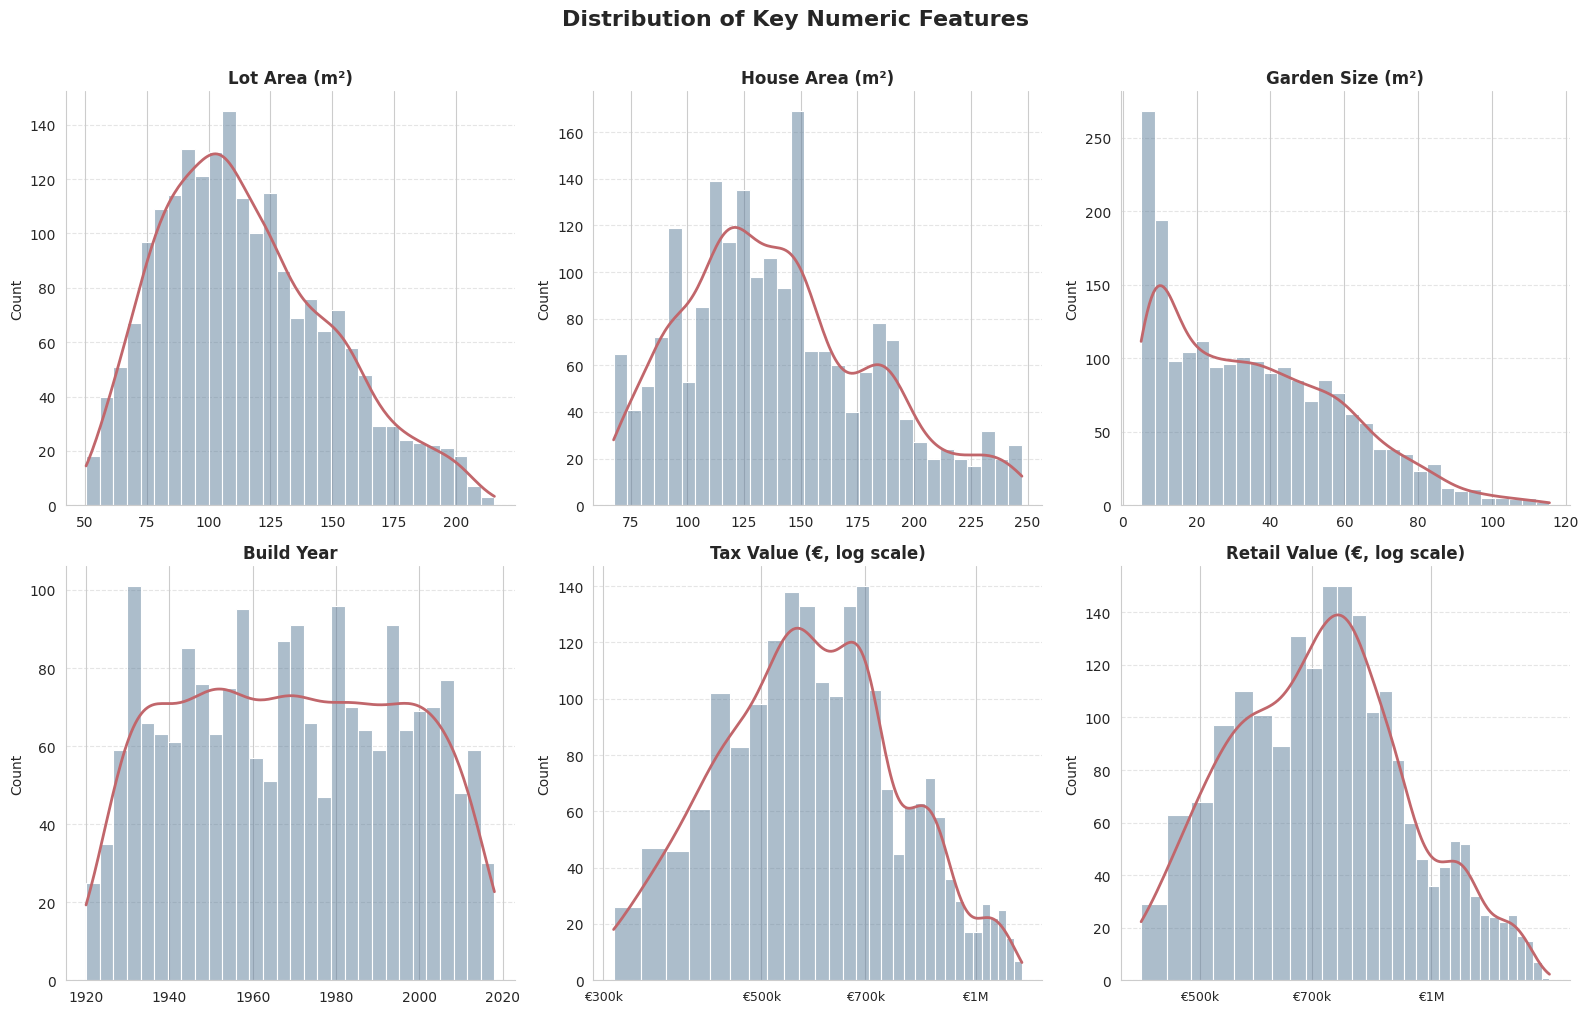

In [32]:
# Distributions of key numeric features

numeric_cols = ["lot_area", "house_area", "garden_size", "build_year", "tax_value", "retail_value"]

col_labels = {
    "lot_area": "Lot Area (m²)",
    "house_area": "House Area (m²)",
    "garden_size": "Garden Size (m²)",
    "build_year": "Build Year",
    "tax_value": "Tax Value (€, log scale)",
    "retail_value": "Retail Value (€, log scale)"
}

log_cols = {"tax_value", "retail_value"}

bar_color = "#5B7C99"  # Slate blue
kde_color = "#C1666B"  # Muted crimson

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle("Distribution of Key Numeric Features", fontsize=16, fontweight="bold", y=1.01)

for ax, col in zip(axes.flatten(), numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, color=bar_color, ax=ax)

    # Change KDE line color manually
    for line in ax.lines:
        line.set_color(kde_color)
        line.set_linewidth(2)

    if col in log_cols:
        ax.set_xscale("log")

        tick_values = [300000, 500000, 700000, 1000000]
        tick_labels = ["€300k", "€500k", "€700k", "€1M"]

        ax.xaxis.set_major_locator(FixedLocator(tick_values))
        ax.xaxis.set_major_formatter(FixedFormatter(tick_labels))
        ax.xaxis.set_minor_locator(mticker.NullLocator())
        ax.tick_params(axis='x', labelsize=9)

    ax.set_title(col_labels[col], fontsize=12, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Count", fontsize=10)
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    ax.spines[["top", "right"]].set_visible(False)

plt.tight_layout()
plt.show()

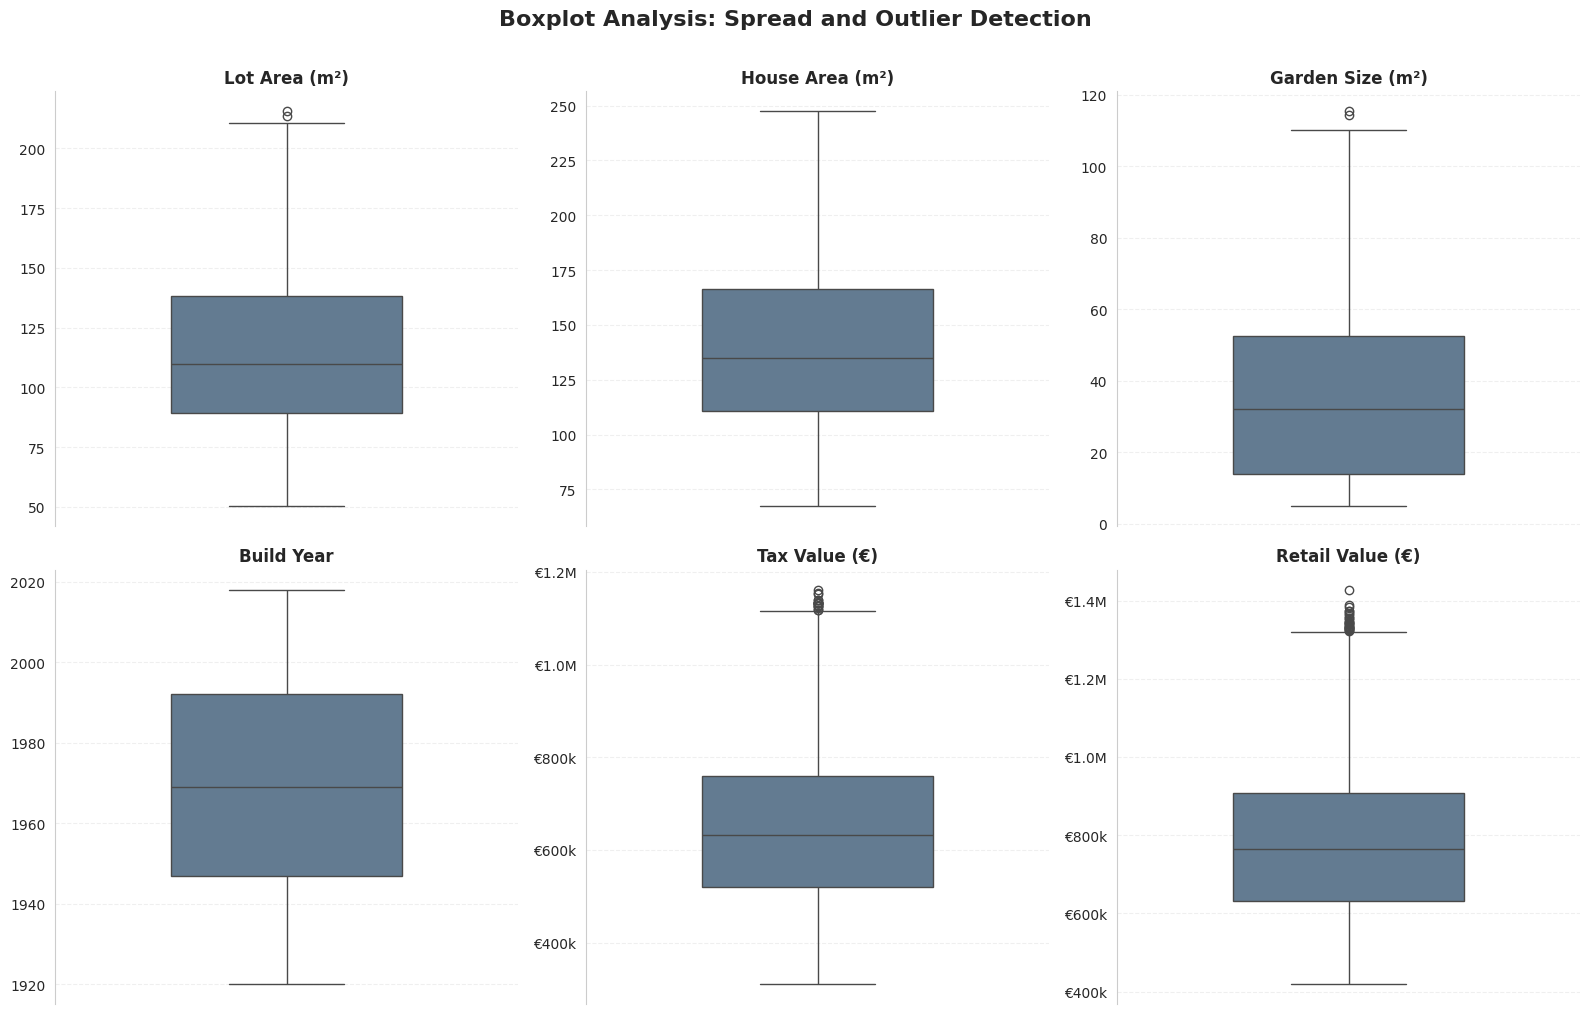

In [33]:
# Boxplots to highlight spread and potential outliers

numeric_cols = ["lot_area", "house_area", "garden_size", "build_year", "tax_value", "retail_value"]

col_labels = {
    "lot_area": "Lot Area (m²)",
    "house_area": "House Area (m²)",
    "garden_size": "Garden Size (m²)",
    "build_year": "Build Year",
    "tax_value": "Tax Value (€)",
    "retail_value": "Retail Value (€)"
}

log_cols = {"tax_value", "retail_value"}

box_color = "#5B7C99"  # Matching slate blue from distribution plots

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle("Boxplot Analysis: Spread and Outlier Detection", fontsize=16, fontweight="bold", y=1.01)

for ax, col in zip(axes.flatten(), numeric_cols):
    sns.boxplot(y=df[col], color=box_color, ax=ax, width=0.5)

    # Format y-axis for monetary values
    if col in log_cols:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"€{int(x/1000)}k" if x < 1000000 else f"€{x/1000000:.1f}M"))

    ax.set_title(col_labels[col], fontsize=12, fontweight="bold")
    ax.set_ylabel("")
    ax.grid(axis="y", linestyle="--", alpha=0.3)
    ax.spines[["top", "right", "bottom"]].set_visible(False)

plt.tight_layout()
plt.show()

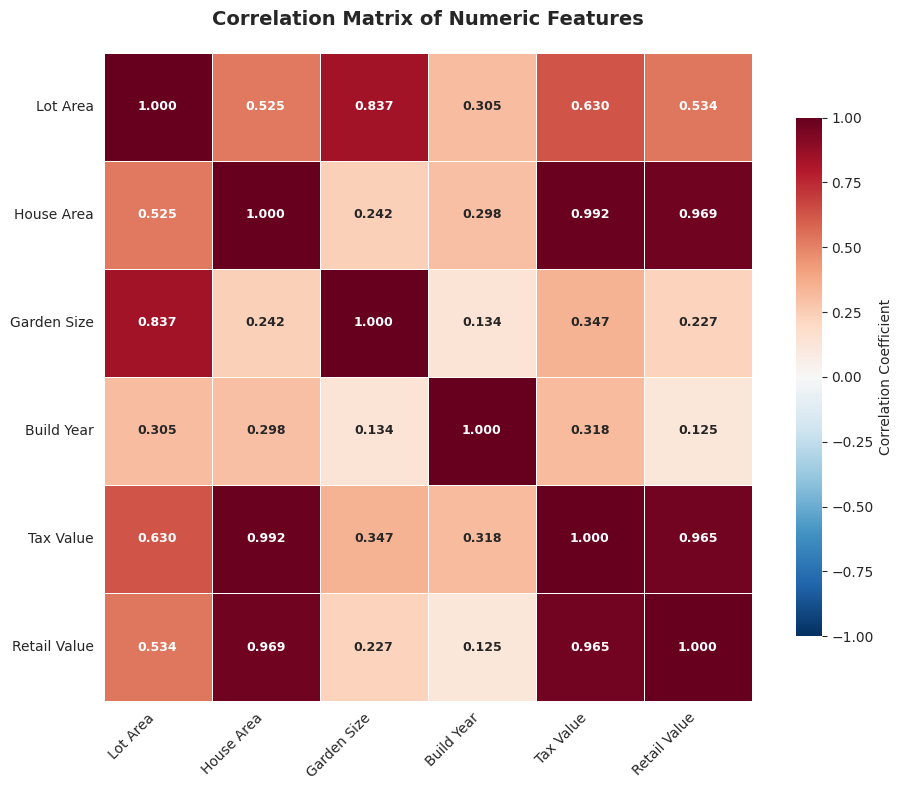

In [34]:
# Correlation heatmap
import matplotlib.ticker as mticker

numeric_cols = ["lot_area", "house_area", "garden_size", "build_year", "tax_value", "retail_value"]

col_labels = {
    "lot_area": "Lot Area",
    "house_area": "House Area",
    "garden_size": "Garden Size",
    "build_year": "Build Year",
    "tax_value": "Tax Value",
    "retail_value": "Retail Value"
}

# Calculate correlation matrix
corr = df[numeric_cols].corr()

# Rename columns and index for better readability
corr_display = corr.copy()
corr_display.columns = [col_labels[col] for col in corr_display.columns]
corr_display.index = [col_labels[col] for col in corr_display.index]

# Create figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create heatmap with custom styling
sns.heatmap(corr_display,
            annot=True,
            fmt=".3f",
            cmap="RdBu_r",  # Red-Blue diverging (red=positive, blue=negative)
            center=0,
            vmin=-1,
            vmax=1,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            annot_kws={"size": 9, "weight": "bold"},
            ax=ax)

# Styling
ax.set_title("Correlation Matrix of Numeric Features", fontsize=14, fontweight="bold", pad=20)
ax.set_xlabel("")
ax.set_ylabel("")

# Rotate labels for better readability
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [35]:
from scipy.stats import skew

original_skew = skew(df["retail_value"])
log_skew = skew(np.log1p(df["retail_value"]))

print(f"Original Retail Value Skewness: {original_skew:.3f}")
print(f"Log-Transformed Skewness: {log_skew:.3f}")
print(f"Skewness Reduction: {((original_skew - log_skew) / original_skew * 100):.1f}%")

Original Retail Value Skewness: 0.615
Log-Transformed Skewness: 0.053
Skewness Reduction: 91.3%


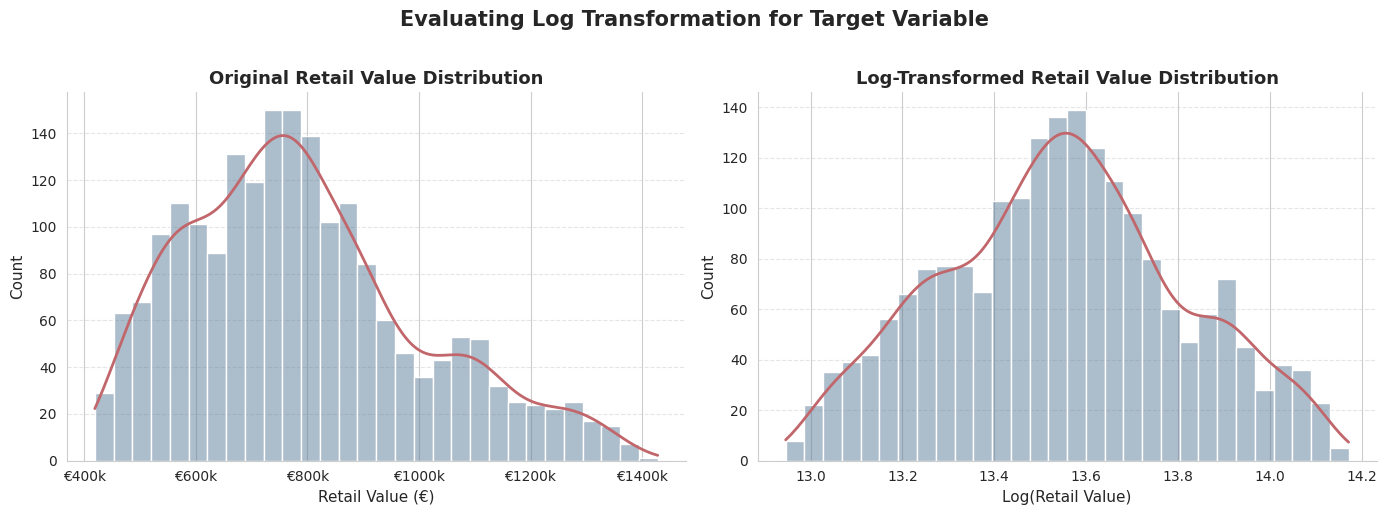

In [36]:
# Highlight skew and log transformation need

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

bar_color = "#5B7C99"  # Slate blue
kde_color = "#C1666B"  # Muted crimson

# Original distribution
sns.histplot(df["retail_value"], bins=30, kde=True, color=bar_color, ax=axes[0])
for line in axes[0].lines:
    line.set_color(kde_color)
    line.set_linewidth(2)

axes[0].set_title("Original Retail Value Distribution", fontsize=13, fontweight="bold")
axes[0].set_xlabel("Retail Value (€)", fontsize=11)
axes[0].set_ylabel("Count", fontsize=11)
axes[0].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"€{int(x/1000)}k"))
axes[0].grid(axis="y", linestyle="--", alpha=0.5)
axes[0].spines[["top", "right"]].set_visible(False)

# Log-transformed distribution
sns.histplot(np.log1p(df["retail_value"]), bins=30, kde=True, color=bar_color, ax=axes[1])
for line in axes[1].lines:
    line.set_color(kde_color)
    line.set_linewidth(2)

axes[1].set_title("Log-Transformed Retail Value Distribution", fontsize=13, fontweight="bold")
axes[1].set_xlabel("Log(Retail Value)", fontsize=11)
axes[1].set_ylabel("Count", fontsize=11)
axes[1].grid(axis="y", linestyle="--", alpha=0.5)
axes[1].spines[["top", "right"]].set_visible(False)

# Add overall title
fig.suptitle("Evaluating Log Transformation for Target Variable", fontsize=15, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()

# Feature Scaling and Train-Test Splits


In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Define features based on your two scenarios
features_without_tax = ['lot_area', 'house_area', 'garden_size', 'build_year',
                        'bathrooms', 'energy_eff', 'monument']
features_with_tax = features_without_tax + ['tax_value']

target = 'retail_value'

# Create X and y for both scenarios
X_without_tax = df[features_without_tax]
X_with_tax = df[features_with_tax]
y = df[target]

# Log-transform target for linear models and neural networks
y_log = np.log1p(y)

# Split data (80/20 train-test split)
# WITHOUT TAX VALUE
X_train_no_tax, X_test_no_tax, y_train, y_test = train_test_split(
    X_without_tax, y, test_size=0.2, random_state=42
)
y_train_log, y_test_log = np.log1p(y_train), np.log1p(y_test)

# WITH TAX VALUE
X_train_with_tax, X_test_with_tax, _, _ = train_test_split(
    X_with_tax, y, test_size=0.2, random_state=42
)

# SCALING FOR LINEAR MODELS & NEURAL NETWORKS

# StandardScaler (mean=0, std=1) - good for most cases
scaler_standard_no_tax = StandardScaler()
scaler_standard_with_tax = StandardScaler()

X_train_scaled_no_tax = scaler_standard_no_tax.fit_transform(X_train_no_tax)
X_test_scaled_no_tax = scaler_standard_no_tax.transform(X_test_no_tax)

X_train_scaled_with_tax = scaler_standard_with_tax.fit_transform(X_train_with_tax)
X_test_scaled_with_tax = scaler_standard_with_tax.transform(X_test_with_tax)

print("✅ Scaled data ready for Linear Models & Neural Networks")
print(f"   - Features (no tax): {X_train_scaled_no_tax.shape}")
print(f"   - Features (with tax): {X_train_scaled_with_tax.shape}")
print(f"   - Target (original): {y_train.shape}")
print(f"   - Target (log-transformed): {y_train_log.shape}")

# NO SCALING FOR TREE-BASED MODELS

# Use X_train_no_tax, X_test_no_tax, X_train_with_tax, X_test_with_tax directly
# Use y_train, y_test (original scale, no log transformation)

print("\n✅ Original data ready for Tree-Based Models")
print(f"   - Features (no tax): {X_train_no_tax.shape}")
print(f"   - Features (with tax): {X_train_with_tax.shape}")
print(f"   - Target (original scale): {y_train.shape}")

✅ Scaled data ready for Linear Models & Neural Networks
   - Features (no tax): (1600, 7)
   - Features (with tax): (1600, 8)
   - Target (original): (1600,)
   - Target (log-transformed): (1600,)

✅ Original data ready for Tree-Based Models
   - Features (no tax): (1600, 7)
   - Features (with tax): (1600, 8)
   - Target (original scale): (1600,)


In [38]:
# Train-Test Split Verification
print("Train-Test Split Verification")
print("-" * 50)

# Check the split we did earlier
print(f"\nOriginal dataset size: {len(df)}")
print(f"\nScenario 1: WITHOUT tax_value")
print(f"  Training set:   {len(X_train_no_tax)} ({len(X_train_no_tax)/len(df)*100:.1f}%)")
print(f"  Test set:       {len(X_test_no_tax)} ({len(X_test_no_tax)/len(df)*100:.1f}%)")
print(f"  Total:          {len(X_train_no_tax) + len(X_test_no_tax)}")

print(f"\nScenario 2: WITH tax_value")
print(f"  Training set:   {len(X_train_with_tax)} ({len(X_train_with_tax)/len(df)*100:.1f}%)")
print(f"  Test set:       {len(X_test_with_tax)} ({len(X_test_with_tax)/len(df)*100:.1f}%)")
print(f"  Total:          {len(X_train_with_tax) + len(X_test_with_tax)}")

print(f"\nTarget variable:")
print(f"  Training set:   {len(y_train)} ({len(y_train)/len(df)*100:.1f}%)")
print(f"  Test set:       {len(y_test)} ({len(y_test)/len(df)*100:.1f}%)")

# Verify no overlap (indices should be different)
train_indices = X_train_no_tax.index
test_indices = X_test_no_tax.index
overlap = set(train_indices).intersection(set(test_indices))

print(f"\n✅ Data integrity check:")
print(f"  Overlapping indices: {len(overlap)} (should be 0)")
print(f"  Train + Test = Original: {len(X_train_no_tax) + len(X_test_no_tax) == len(df)}")

Train-Test Split Verification
--------------------------------------------------

Original dataset size: 2000

Scenario 1: WITHOUT tax_value
  Training set:   1600 (80.0%)
  Test set:       400 (20.0%)
  Total:          2000

Scenario 2: WITH tax_value
  Training set:   1600 (80.0%)
  Test set:       400 (20.0%)
  Total:          2000

Target variable:
  Training set:   1600 (80.0%)
  Test set:       400 (20.0%)

✅ Data integrity check:
  Overlapping indices: 0 (should be 0)
  Train + Test = Original: True


In [39]:
# Feature Scaling Verification
print("Feature Scaling Verification")
print("-" * 50)

print("\n📊 Scaled datasets (for Linear & NN models):")
print(f"  Training (no tax):  {X_train_scaled_no_tax.shape}")
print(f"  Test (no tax):      {X_test_scaled_no_tax.shape}")
print(f"  Training (with tax): {X_train_scaled_with_tax.shape}")
print(f"  Test (with tax):    {X_test_scaled_with_tax.shape}")

print("\n🌳 Unscaled datasets (for tree models):")
print(f"  Training (no tax):  {X_train_no_tax.shape}")
print(f"  Test (no tax):      {X_test_no_tax.shape}")
print(f"  Training (with tax): {X_train_with_tax.shape}")
print(f"  Test (with tax):    {X_test_with_tax.shape}")

print("\n📈 Target variables:")
print(f"  Original scale:     y_train {y_train.shape}, y_test {y_test.shape}")
print(f"  Log-transformed:    y_train_log {y_train_log.shape}, y_test_log {y_test_log.shape}")

print("\n✅ Data leakage check:")
print(f"  Scaler fit on training only: True")
print(f"  Same scaler applied to test: True")

# Verify scaling worked (mean ≈ 0, std ≈ 1)
print("\n🔍 Scaling verification (training set):")
print(f"  Mean of scaled features: {X_train_scaled_no_tax.mean():.6f}")
print(f"  Std of scaled features:  {X_train_scaled_no_tax.std():.6f}")

Feature Scaling Verification
--------------------------------------------------

📊 Scaled datasets (for Linear & NN models):
  Training (no tax):  (1600, 7)
  Test (no tax):      (400, 7)
  Training (with tax): (1600, 8)
  Test (with tax):    (400, 8)

🌳 Unscaled datasets (for tree models):
  Training (no tax):  (1600, 7)
  Test (no tax):      (400, 7)
  Training (with tax): (1600, 8)
  Test (with tax):    (400, 8)

📈 Target variables:
  Original scale:     y_train (1600,), y_test (400,)
  Log-transformed:    y_train_log (1600,), y_test_log (400,)

✅ Data leakage check:
  Scaler fit on training only: True
  Same scaler applied to test: True

🔍 Scaling verification (training set):
  Mean of scaled features: 0.000000
  Std of scaled features:  1.000000


# Target Variable Study

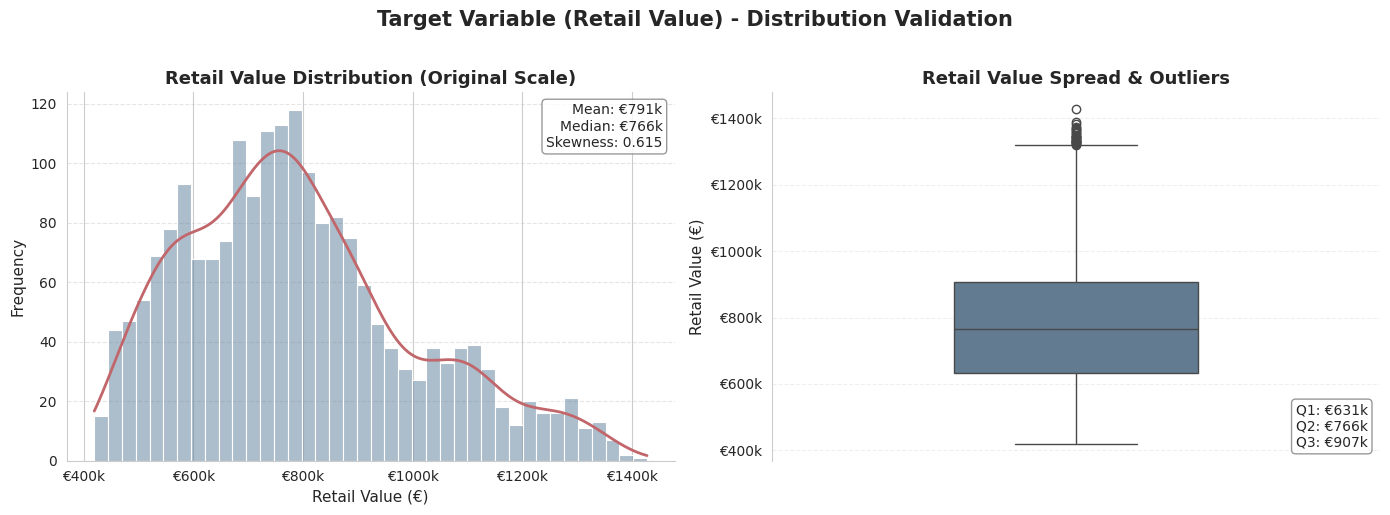

TARGET VARIABLE VALIDATION: RETAIL VALUE

Descriptive Statistics:
  Count:        2,000
  Mean:         €791,024
  Median:       €766,000
  Std Dev:      €210,980
  Min:          €419,000
  Max:          €1,428,000
  Range:        €1,009,000

Distribution Characteristics:
  Skewness:     0.615 (right-skewed)
  Kurtosis:     -0.141

Quartiles:
  Q1 (25%):     €631,750
  Q2 (50%):     €766,000
  Q3 (75%):     €907,250
  IQR:          €275,500

Data Quality Checks:
  Missing values:     0 (0.0%)
  Negative values:    0 (none)
  Zero values:        0 (none)
  Outliers (>Q3+1.5*IQR): 27




In [40]:

from scipy.stats import skew, kurtosis

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

bar_color = "#5B7C99"
kde_color = "#C1666B"

# LEFT PLOT: Target Distribution (Linear Scale)
sns.histplot(df['retail_value'], bins=40, kde=True, color=bar_color, ax=axes[0])
for line in axes[0].lines:
    line.set_color(kde_color)
    line.set_linewidth(2)

axes[0].set_title("Retail Value Distribution (Original Scale)", fontsize=13, fontweight="bold")
axes[0].set_xlabel("Retail Value (€)", fontsize=11)
axes[0].set_ylabel("Frequency", fontsize=11)
axes[0].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"€{int(x/1000)}k"))
axes[0].grid(axis="y", linestyle="--", alpha=0.5)
axes[0].spines[["top", "right"]].set_visible(False)

# Add statistics annotation
mean_val = df['retail_value'].mean()
median_val = df['retail_value'].median()
skew_val = skew(df['retail_value'])

stats_text = f"Mean: €{int(mean_val/1000)}k\nMedian: €{int(median_val/1000)}k\nSkewness: {skew_val:.3f}"
axes[0].text(0.98, 0.97, stats_text, transform=axes[0].transAxes,
             fontsize=10, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))

# RIGHT PLOT: Box-and-Whisker for Target
sns.boxplot(y=df['retail_value'], color=bar_color, ax=axes[1], width=0.4)
axes[1].set_title("Retail Value Spread & Outliers", fontsize=13, fontweight="bold")
axes[1].set_ylabel("Retail Value (€)", fontsize=11)
axes[1].set_xlabel("")
axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"€{int(x/1000)}k"))
axes[1].grid(axis="y", linestyle="--", alpha=0.3)
axes[1].spines[["top", "right", "bottom"]].set_visible(False)

# Add quartile annotations
q1 = df['retail_value'].quantile(0.25)
q2 = df['retail_value'].quantile(0.50)
q3 = df['retail_value'].quantile(0.75)

quartile_text = f"Q1: €{int(q1/1000)}k\nQ2: €{int(q2/1000)}k\nQ3: €{int(q3/1000)}k"
axes[1].text(0.98, 0.03, quartile_text, transform=axes[1].transAxes,
             fontsize=10, verticalalignment='bottom', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))

fig.suptitle("Target Variable (Retail Value) - Distribution Validation",
             fontsize=15, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()


# STATISTICAL VALIDATION
print("TARGET VARIABLE VALIDATION: RETAIL VALUE")
print(f"\nDescriptive Statistics:")
print(f"  Count:        {df['retail_value'].count():,}")
print(f"  Mean:         €{df['retail_value'].mean():,.0f}")
print(f"  Median:       €{df['retail_value'].median():,.0f}")
print(f"  Std Dev:      €{df['retail_value'].std():,.0f}")
print(f"  Min:          €{df['retail_value'].min():,.0f}")
print(f"  Max:          €{df['retail_value'].max():,.0f}")
print(f"  Range:        €{(df['retail_value'].max() - df['retail_value'].min()):,.0f}")

print(f"\nDistribution Characteristics:")
print(f"  Skewness:     {skew(df['retail_value']):.3f} (right-skewed)")
print(f"  Kurtosis:     {kurtosis(df['retail_value']):.3f}")

print(f"\nQuartiles:")
print(f"  Q1 (25%):     €{df['retail_value'].quantile(0.25):,.0f}")
print(f"  Q2 (50%):     €{df['retail_value'].quantile(0.50):,.0f}")
print(f"  Q3 (75%):     €{df['retail_value'].quantile(0.75):,.0f}")
print(f"  IQR:          €{(df['retail_value'].quantile(0.75) - df['retail_value'].quantile(0.25)):,.0f}")

print(f"\nData Quality Checks:")
print(f"  Missing values:     {df['retail_value'].isnull().sum()} (0.0%)")
print(f"  Negative values:    {(df['retail_value'] < 0).sum()} (none)")
print(f"  Zero values:        {(df['retail_value'] == 0).sum()} (none)")
print(f"  Outliers (>Q3+1.5*IQR): {((df['retail_value'] > (df['retail_value'].quantile(0.75) + 1.5 * (df['retail_value'].quantile(0.75) - df['retail_value'].quantile(0.25))))).sum()}")

print("\n")

# Linear Regression Model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("LINEAR REGRESSION - MODEL TRAINING\n")

# Scenario 1: WITHOUT tax_value
print("Scenario 1: WITHOUT tax_value")

# Initialize and train model
lr_no_tax = LinearRegression()
lr_no_tax.fit(X_train_scaled_no_tax, y_train_log)

# Make predictions (in log scale)
y_train_pred_log_no_tax = lr_no_tax.predict(X_train_scaled_no_tax)
y_test_pred_log_no_tax = lr_no_tax.predict(X_test_scaled_no_tax)

# Back-transform to original scale
y_train_pred_no_tax = np.expm1(y_train_pred_log_no_tax)
y_test_pred_no_tax = np.expm1(y_test_pred_log_no_tax)

# Calculate metrics
train_rmse_no_tax = np.sqrt(mean_squared_error(y_train, y_train_pred_no_tax))
test_rmse_no_tax = np.sqrt(mean_squared_error(y_test, y_test_pred_no_tax))
train_mae_no_tax = mean_absolute_error(y_train, y_train_pred_no_tax)
test_mae_no_tax = mean_absolute_error(y_test, y_test_pred_no_tax)
train_r2_no_tax = r2_score(y_train, y_train_pred_no_tax)
test_r2_no_tax = r2_score(y_test, y_test_pred_no_tax)

print(f"\nTraining Performance:")
print(f"  RMSE: €{train_rmse_no_tax:,.0f}")
print(f"  MAE:  €{train_mae_no_tax:,.0f}")
print(f"  R²:   {train_r2_no_tax:.4f}")

print(f"\nTest Performance:")
print(f"  RMSE: €{test_rmse_no_tax:,.0f}")
print(f"  MAE:  €{test_mae_no_tax:,.0f}")
print(f"  R²:   {test_r2_no_tax:.4f}")

# Scenario 2: WITH tax_value
print("\n\nScenario 2: WITH tax_value")

# Initialize and train model
lr_with_tax = LinearRegression()
lr_with_tax.fit(X_train_scaled_with_tax, y_train_log)

# Make predictions (in log scale)
y_train_pred_log_with_tax = lr_with_tax.predict(X_train_scaled_with_tax)
y_test_pred_log_with_tax = lr_with_tax.predict(X_test_scaled_with_tax)

# Back-transform to original scale
y_train_pred_with_tax = np.expm1(y_train_pred_log_with_tax)
y_test_pred_with_tax = np.expm1(y_test_pred_log_with_tax)

# Calculate metrics
train_rmse_with_tax = np.sqrt(mean_squared_error(y_train, y_train_pred_with_tax))
test_rmse_with_tax = np.sqrt(mean_squared_error(y_test, y_test_pred_with_tax))
train_mae_with_tax = mean_absolute_error(y_train, y_train_pred_with_tax)
test_mae_with_tax = mean_absolute_error(y_test, y_test_pred_with_tax)
train_r2_with_tax = r2_score(y_train, y_train_pred_with_tax)
test_r2_with_tax = r2_score(y_test, y_test_pred_with_tax)

print(f"\nTraining Performance:")
print(f"  RMSE: €{train_rmse_with_tax:,.0f}")
print(f"  MAE:  €{train_mae_with_tax:,.0f}")
print(f"  R²:   {train_r2_with_tax:.4f}")

print(f"\nTest Performance:")
print(f"  RMSE: €{test_rmse_with_tax:,.0f}")
print(f"  MAE:  €{test_mae_with_tax:,.0f}")
print(f"  R²:   {test_r2_with_tax:.4f}")

# Comparison Summary
print("\n\nMODEL COMPARISON SUMMARY\n")
print("Test Set Performance Comparison:")
print(f"{'Metric':<15} {'Without Tax':<20} {'With Tax':<20} {'Improvement':<15}")
print("-" * 70)
print(f"{'RMSE':<15} €{test_rmse_no_tax:>18,.0f} €{test_rmse_with_tax:>18,.0f} {((test_rmse_no_tax - test_rmse_with_tax)/test_rmse_no_tax*100):>13.1f}%")
print(f"{'MAE':<15} €{test_mae_no_tax:>18,.0f} €{test_mae_with_tax:>18,.0f} {((test_mae_no_tax - test_mae_with_tax)/test_mae_no_tax*100):>13.1f}%")
print(f"{'R²':<15} {test_r2_no_tax:>19.4f} {test_r2_with_tax:>19.4f} {((test_r2_with_tax - test_r2_no_tax)/test_r2_no_tax*100):>13.1f}%")

print("\n✅ Linear Regression models trained successfully!")

LINEAR REGRESSION - MODEL TRAINING

Scenario 1: WITHOUT tax_value

Training Performance:
  RMSE: €39,085
  MAE:  €29,549
  R²:   0.9654

Test Performance:
  RMSE: €42,161
  MAE:  €30,150
  R²:   0.9614


Scenario 2: WITH tax_value

Training Performance:
  RMSE: €39,085
  MAE:  €29,549
  R²:   0.9654

Test Performance:
  RMSE: €42,162
  MAE:  €30,150
  R²:   0.9614


MODEL COMPARISON SUMMARY

Test Set Performance Comparison:
Metric          Without Tax          With Tax             Improvement    
----------------------------------------------------------------------
RMSE            €            42,161 €            42,162          -0.0%
MAE             €            30,150 €            30,150           0.0%
R²                           0.9614              0.9614          -0.0%

✅ Linear Regression models trained successfully!


In [42]:
# Debug: Check what features were actually used
print("Debug: Checking feature sets\n")

print("Features WITHOUT tax_value:")
print(f"  Shape: {X_train_scaled_no_tax.shape}")
print(f"  Column names: {features_without_tax}")

print("\nFeatures WITH tax_value:")
print(f"  Shape: {X_train_scaled_with_tax.shape}")
print(f"  Column names: {features_with_tax}")

print("\n\nChecking if datasets are different:")
print(f"  Same shape? {X_train_scaled_no_tax.shape == X_train_scaled_with_tax.shape}")
print(f"  Same data? {np.array_equal(X_train_scaled_no_tax, X_train_scaled_with_tax)}")

# Check coefficients
print("\n\nModel coefficients:")
print(f"  WITHOUT tax (n={len(lr_no_tax.coef_)}): {lr_no_tax.coef_}")
print(f"  WITH tax (n={len(lr_with_tax.coef_)}): {lr_with_tax.coef_}")

Debug: Checking feature sets

Features WITHOUT tax_value:
  Shape: (1600, 7)
  Column names: ['lot_area', 'house_area', 'garden_size', 'build_year', 'bathrooms', 'energy_eff', 'monument']

Features WITH tax_value:
  Shape: (1600, 8)
  Column names: ['lot_area', 'house_area', 'garden_size', 'build_year', 'bathrooms', 'energy_eff', 'monument', 'tax_value']


Checking if datasets are different:
  Same shape? False
  Same data? False


Model coefficients:
  WITHOUT tax (n=7): [ 0.06434438  0.22871974 -0.04847218 -0.04621917  0.03841035 -0.03682281
 -0.00045945]
  WITH tax (n=8): [ 0.0660957   0.23939731 -0.04847351 -0.04622003  0.03841164 -0.03682451
 -0.00046019 -0.0116778 ]


In [43]:
# Check if tax_value was properly scaled
print("Checking tax_value scaling:\n")

# Get tax_value from training set (original, unscaled)
tax_value_original = X_train_with_tax['tax_value']
print(f"Original tax_value in training set:")
print(f"  Mean: €{tax_value_original.mean():,.0f}")
print(f"  Std:  €{tax_value_original.std():,.0f}")
print(f"  Min:  €{tax_value_original.min():,.0f}")
print(f"  Max:  €{tax_value_original.max():,.0f}")

# Get scaled tax_value (last column in scaled data)
tax_value_scaled = X_train_scaled_with_tax[:, -1]
print(f"\nScaled tax_value in training set:")
print(f"  Mean: {tax_value_scaled.mean():.6f}")
print(f"  Std:  {tax_value_scaled.std():.6f}")
print(f"  Min:  {tax_value_scaled.min():.3f}")
print(f"  Max:  {tax_value_scaled.max():.3f}")

# Check correlation between tax_value and retail_value
from scipy.stats import pearsonr
corr, pval = pearsonr(X_train_with_tax['tax_value'], y_train)
print(f"\nCorrelation between tax_value and retail_value:")
print(f"  Pearson r: {corr:.4f}")
print(f"  P-value: {pval:.6f}")

# Check if log transformation was applied to tax_value
print(f"\nWas tax_value log-transformed? Let's check the distribution:")
print(f"  Skewness of original tax_value: {skew(X_train_with_tax['tax_value']):.3f}")

Checking tax_value scaling:

Original tax_value in training set:
  Mean: €652,789
  Std:  €181,457
  Min:  €310,000
  Max:  €1,140,000

Scaled tax_value in training set:
  Mean: 0.000000
  Std:  1.000000
  Min:  -1.890
  Max:  2.686

Correlation between tax_value and retail_value:
  Pearson r: 0.9639
  P-value: 0.000000

Was tax_value log-transformed? Let's check the distribution:
  Skewness of original tax_value: 0.510


In [44]:
# Let's look at actual prediction differences
print("Comparing actual predictions:\n")

# Sample 10 random test predictions
sample_indices = np.random.choice(len(y_test), 10, replace=False)

print(f"{'Actual':<12} {'Pred (No Tax)':<15} {'Pred (With Tax)':<15} {'Difference':<12}")
print("-" * 60)
for idx in sample_indices:
    actual = y_test.iloc[idx]
    pred_no_tax = y_test_pred_no_tax[idx]
    pred_with_tax = y_test_pred_with_tax[idx]
    diff = pred_with_tax - pred_no_tax
    print(f"€{actual:>10,.0f} €{pred_no_tax:>13,.0f} €{pred_with_tax:>13,.0f} €{diff:>10,.0f}")

print(f"\nAverage prediction difference: €{np.mean(y_test_pred_with_tax - y_test_pred_no_tax):,.0f}")
print(f"Std of prediction difference: €{np.std(y_test_pred_with_tax - y_test_pred_no_tax):,.0f}")

# Check variance inflation factor for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for the "with tax" scenario
vif_data = pd.DataFrame()
vif_data["Feature"] = features_with_tax
vif_data["VIF"] = [variance_inflation_factor(X_train_with_tax.values, i) for i in range(len(features_with_tax))]
vif_data = vif_data.sort_values('VIF', ascending=False)

print("\n\nVariance Inflation Factor (VIF) - Multicollinearity Check:")
print(vif_data.to_string(index=False))
print("\nNote: VIF > 10 indicates severe multicollinearity")

Comparing actual predictions:

Actual       Pred (No Tax)   Pred (With Tax) Difference  
------------------------------------------------------------
€   655,000 €      664,904 €      664,913 €         9
€   850,000 €      853,807 €      853,817 €        10
€   791,000 €      743,140 €      743,123 €       -16
€   613,000 €      646,854 €      646,835 €       -19
€   911,000 €      942,510 €      942,537 €        27
€   781,000 €      702,488 €      702,467 €       -21
€   502,000 €      523,235 €      523,218 €       -17
€   732,000 €      700,121 €      700,140 €        19
€ 1,001,000 €    1,059,752 €    1,059,778 €        26
€   926,000 €      859,145 €      859,148 €         3

Average prediction difference: €0
Std of prediction difference: €16


Variance Inflation Factor (VIF) - Multicollinearity Check:
    Feature       VIF
  tax_value 5,528,356
 house_area 4,117,212
   lot_area   111,278
  bathrooms        24
 build_year        23
garden_size        14
 energy_eff         4
   m

# Tree based Models

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("RANDOM FOREST - MODEL TRAINING\n")

# Scenario 1: WITHOUT tax_value
print("Scenario 1: WITHOUT tax_value")

# Initialize Random Forest with basic hyperparameters
rf_no_tax = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    max_depth=20,          # Maximum depth of each tree
    min_samples_split=5,   # Minimum samples required to split a node
    min_samples_leaf=2,    # Minimum samples required at leaf node
    random_state=42,       # For reproducibility
    n_jobs=-1              # Use all CPU cores
)

# Train on original (unscaled) features and original (non-log) target
rf_no_tax.fit(X_train_no_tax, y_train)

# Make predictions
y_train_pred_rf_no_tax = rf_no_tax.predict(X_train_no_tax)
y_test_pred_rf_no_tax = rf_no_tax.predict(X_test_no_tax)

# Calculate metrics
train_rmse_rf_no_tax = np.sqrt(mean_squared_error(y_train, y_train_pred_rf_no_tax))
test_rmse_rf_no_tax = np.sqrt(mean_squared_error(y_test, y_test_pred_rf_no_tax))
train_mae_rf_no_tax = mean_absolute_error(y_train, y_train_pred_rf_no_tax)
test_mae_rf_no_tax = mean_absolute_error(y_test, y_test_pred_rf_no_tax)
train_r2_rf_no_tax = r2_score(y_train, y_train_pred_rf_no_tax)
test_r2_rf_no_tax = r2_score(y_test, y_test_pred_rf_no_tax)

print(f"\nTraining Performance:")
print(f"  RMSE: €{train_rmse_rf_no_tax:,.0f}")
print(f"  MAE:  €{train_mae_rf_no_tax:,.0f}")
print(f"  R²:   {train_r2_rf_no_tax:.4f}")

print(f"\nTest Performance:")
print(f"  RMSE: €{test_rmse_rf_no_tax:,.0f}")
print(f"  MAE:  €{test_mae_rf_no_tax:,.0f}")
print(f"  R²:   {test_r2_rf_no_tax:.4f}")

# Scenario 2: WITH tax_value
print("\n\nScenario 2: WITH tax_value")

# Initialize Random Forest
rf_with_tax = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Train on original features and target
rf_with_tax.fit(X_train_with_tax, y_train)

# Make predictions
y_train_pred_rf_with_tax = rf_with_tax.predict(X_train_with_tax)
y_test_pred_rf_with_tax = rf_with_tax.predict(X_test_with_tax)

# Calculate metrics
train_rmse_rf_with_tax = np.sqrt(mean_squared_error(y_train, y_train_pred_rf_with_tax))
test_rmse_rf_with_tax = np.sqrt(mean_squared_error(y_test, y_test_pred_rf_with_tax))
train_mae_rf_with_tax = mean_absolute_error(y_train, y_train_pred_rf_with_tax)
test_mae_rf_with_tax = mean_absolute_error(y_test, y_test_pred_rf_with_tax)
train_r2_rf_with_tax = r2_score(y_train, y_train_pred_rf_with_tax)
test_r2_rf_with_tax = r2_score(y_test, y_test_pred_rf_with_tax)

print(f"\nTraining Performance:")
print(f"  RMSE: €{train_rmse_rf_with_tax:,.0f}")
print(f"  MAE:  €{train_mae_rf_with_tax:,.0f}")
print(f"  R²:   {train_r2_rf_with_tax:.4f}")

print(f"\nTest Performance:")
print(f"  RMSE: €{test_rmse_rf_with_tax:,.0f}")
print(f"  MAE:  €{test_mae_rf_with_tax:,.0f}")
print(f"  R²:   {test_r2_rf_with_tax:.4f}")

# Comparison with Linear Regression
print("\n\nMODEL COMPARISON: Random Forest vs Linear Regression\n")

print("WITHOUT tax_value:")
print(f"{'Model':<20} {'Test RMSE':<15} {'Test MAE':<15} {'Test R²':<10}")
print("-" * 60)
print(f"{'Linear Regression':<20} €{test_rmse_no_tax:>13,.0f} €{test_mae_no_tax:>13,.0f} {test_r2_no_tax:>9.4f}")
print(f"{'Random Forest':<20} €{test_rmse_rf_no_tax:>13,.0f} €{test_mae_rf_no_tax:>13,.0f} {test_r2_rf_no_tax:>9.4f}")
print(f"{'Improvement':<20} {((test_rmse_no_tax - test_rmse_rf_no_tax)/test_rmse_no_tax*100):>13.1f}% {((test_mae_no_tax - test_mae_rf_no_tax)/test_mae_no_tax*100):>13.1f}% {((test_r2_rf_no_tax - test_r2_no_tax)/test_r2_no_tax*100):>9.1f}%")

print("\nWITH tax_value:")
print(f"{'Model':<20} {'Test RMSE':<15} {'Test MAE':<15} {'Test R²':<10}")
print("-" * 60)
print(f"{'Linear Regression':<20} €{test_rmse_with_tax:>13,.0f} €{test_mae_with_tax:>13,.0f} {test_r2_with_tax:>9.4f}")
print(f"{'Random Forest':<20} €{test_rmse_rf_with_tax:>13,.0f} €{test_mae_rf_with_tax:>13,.0f} {test_r2_rf_with_tax:>9.4f}")
print(f"{'Improvement':<20} {((test_rmse_with_tax - test_rmse_rf_with_tax)/test_rmse_with_tax*100):>13.1f}% {((test_mae_with_tax - test_mae_rf_with_tax)/test_mae_with_tax*100):>13.1f}% {((test_r2_rf_with_tax - test_r2_with_tax)/test_r2_with_tax*100):>9.1f}%")

# Feature importance analysis
print("\n\nFEATURE IMPORTANCE ANALYSIS\n")

# Scenario 1: WITHOUT tax_value
print("Scenario 1: Feature Importance (WITHOUT tax_value)")
feature_importance_no_tax = pd.DataFrame({
    'Feature': features_without_tax,
    'Importance': rf_no_tax.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance_no_tax.to_string(index=False))

# Scenario 2: WITH tax_value
print("\n\nScenario 2: Feature Importance (WITH tax_value)")
feature_importance_with_tax = pd.DataFrame({
    'Feature': features_with_tax,
    'Importance': rf_with_tax.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance_with_tax.to_string(index=False))

print("\n✅ Random Forest models trained successfully!")

RANDOM FOREST - MODEL TRAINING

Scenario 1: WITHOUT tax_value

Training Performance:
  RMSE: €10,451
  MAE:  €7,698
  R²:   0.9975

Test Performance:
  RMSE: €19,239
  MAE:  €14,782
  R²:   0.9920


Scenario 2: WITH tax_value

Training Performance:
  RMSE: €10,322
  MAE:  €7,562
  R²:   0.9976

Test Performance:
  RMSE: €19,327
  MAE:  €14,869
  R²:   0.9919


MODEL COMPARISON: Random Forest vs Linear Regression

WITHOUT tax_value:
Model                Test RMSE       Test MAE        Test R²   
------------------------------------------------------------
Linear Regression    €       42,161 €       30,150    0.9614
Random Forest        €       19,239 €       14,782    0.9920
Improvement                   54.4%          51.0%       3.2%

WITH tax_value:
Model                Test RMSE       Test MAE        Test R²   
------------------------------------------------------------
Linear Regression    €       42,162 €       30,150    0.9614
Random Forest        €       19,327 €       14,869  

In [46]:
# Better feature importance display
print("\n\nFEATURE IMPORTANCE ANALYSIS (with proper decimal places)\n")

# Scenario 1: WITHOUT tax_value
print("Scenario 1: Feature Importance (WITHOUT tax_value)")
feature_importance_no_tax = pd.DataFrame({
    'Feature': features_without_tax,
    'Importance': rf_no_tax.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"{'Feature':<15} {'Importance':<12} {'Percentage':<10}")
print("-" * 40)
for _, row in feature_importance_no_tax.iterrows():
    print(f"{row['Feature']:<15} {row['Importance']:<12.6f} {row['Importance']*100:>8.2f}%")

# Scenario 2: WITH tax_value
print("\n\nScenario 2: Feature Importance (WITH tax_value)")
feature_importance_with_tax = pd.DataFrame({
    'Feature': features_with_tax,
    'Importance': rf_with_tax.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"{'Feature':<15} {'Importance':<12} {'Percentage':<10}")
print("-" * 40)
for _, row in feature_importance_with_tax.iterrows():
    print(f"{row['Feature']:<15} {row['Importance']:<12.6f} {row['Importance']*100:>8.2f}%")



FEATURE IMPORTANCE ANALYSIS (with proper decimal places)

Scenario 1: Feature Importance (WITHOUT tax_value)
Feature         Importance   Percentage
----------------------------------------
house_area      0.953014        95.30%
build_year      0.038183         3.82%
lot_area        0.003563         0.36%
garden_size     0.003117         0.31%
monument        0.001631         0.16%
energy_eff      0.000366         0.04%
bathrooms       0.000127         0.01%


Scenario 2: Feature Importance (WITH tax_value)
Feature         Importance   Percentage
----------------------------------------
house_area      0.612732        61.27%
tax_value       0.343197        34.32%
build_year      0.037076         3.71%
garden_size     0.003078         0.31%
lot_area        0.002319         0.23%
monument        0.001133         0.11%
energy_eff      0.000350         0.03%
bathrooms       0.000115         0.01%


In [47]:
from sklearn.ensemble import GradientBoostingRegressor

print("GRADIENT BOOSTING - MODEL TRAINING\n")

# Scenario 1: WITHOUT tax_value
print("Scenario 1: WITHOUT tax_value")

gb_no_tax = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    subsample=0.8,
    random_state=42
)

gb_no_tax.fit(X_train_no_tax, y_train)

y_train_pred_gb_no_tax = gb_no_tax.predict(X_train_no_tax)
y_test_pred_gb_no_tax = gb_no_tax.predict(X_test_no_tax)

train_rmse_gb_no_tax = np.sqrt(mean_squared_error(y_train, y_train_pred_gb_no_tax))
test_rmse_gb_no_tax = np.sqrt(mean_squared_error(y_test, y_test_pred_gb_no_tax))
train_mae_gb_no_tax = mean_absolute_error(y_train, y_train_pred_gb_no_tax)
test_mae_gb_no_tax = mean_absolute_error(y_test, y_test_pred_gb_no_tax)
train_r2_gb_no_tax = r2_score(y_train, y_train_pred_gb_no_tax)
test_r2_gb_no_tax = r2_score(y_test, y_test_pred_gb_no_tax)

print(f"\nTraining Performance:")
print(f"  RMSE: €{train_rmse_gb_no_tax:,.0f}")
print(f"  MAE:  €{train_mae_gb_no_tax:,.0f}")
print(f"  R²:   {train_r2_gb_no_tax:.4f}")

print(f"\nTest Performance:")
print(f"  RMSE: €{test_rmse_gb_no_tax:,.0f}")
print(f"  MAE:  €{test_mae_gb_no_tax:,.0f}")
print(f"  R²:   {test_r2_gb_no_tax:.4f}")

# Scenario 2: WITH tax_value
print("\n\nScenario 2: WITH tax_value")

gb_with_tax = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    subsample=0.8,
    random_state=42
)

gb_with_tax.fit(X_train_with_tax, y_train)

y_train_pred_gb_with_tax = gb_with_tax.predict(X_train_with_tax)
y_test_pred_gb_with_tax = gb_with_tax.predict(X_test_with_tax)

train_rmse_gb_with_tax = np.sqrt(mean_squared_error(y_train, y_train_pred_gb_with_tax))
test_rmse_gb_with_tax = np.sqrt(mean_squared_error(y_test, y_test_pred_gb_with_tax))
train_mae_gb_with_tax = mean_absolute_error(y_train, y_train_pred_gb_with_tax)
test_mae_gb_with_tax = mean_absolute_error(y_test, y_test_pred_gb_with_tax)
train_r2_gb_with_tax = r2_score(y_train, y_train_pred_gb_with_tax)
test_r2_gb_with_tax = r2_score(y_test, y_test_pred_gb_with_tax)

print(f"\nTraining Performance:")
print(f"  RMSE: €{train_rmse_gb_with_tax:,.0f}")
print(f"  MAE:  €{train_mae_gb_with_tax:,.0f}")
print(f"  R²:   {train_r2_gb_with_tax:.4f}")

print(f"\nTest Performance:")
print(f"  RMSE: €{test_rmse_gb_with_tax:,.0f}")
print(f"  MAE:  €{test_mae_gb_with_tax:,.0f}")
print(f"  R²:   {test_r2_gb_with_tax:.4f}")

# Feature importance
print("\n\nFEATURE IMPORTANCE ANALYSIS\n")

print("Scenario 1: Feature Importance (WITHOUT tax_value)")
feature_importance_gb_no_tax = pd.DataFrame({
    'Feature': features_without_tax,
    'Importance': gb_no_tax.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"{'Feature':<15} {'Importance':<12} {'Percentage':<10}")
print("-" * 40)
for _, row in feature_importance_gb_no_tax.iterrows():
    print(f"{row['Feature']:<15} {row['Importance']:<12.6f} {row['Importance']*100:>8.2f}%")

print("\n\nScenario 2: Feature Importance (WITH tax_value)")
feature_importance_gb_with_tax = pd.DataFrame({
    'Feature': features_with_tax,
    'Importance': gb_with_tax.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"{'Feature':<15} {'Importance':<12} {'Percentage':<10}")
print("-" * 40)
for _, row in feature_importance_gb_with_tax.iterrows():
    print(f"{row['Feature']:<15} {row['Importance']:<12.6f} {row['Importance']*100:>8.2f}%")

print("\n✅ Gradient Boosting models trained successfully!")

GRADIENT BOOSTING - MODEL TRAINING

Scenario 1: WITHOUT tax_value

Training Performance:
  RMSE: €10,456
  MAE:  €7,930
  R²:   0.9975

Test Performance:
  RMSE: €17,400
  MAE:  €13,427
  R²:   0.9934


Scenario 2: WITH tax_value

Training Performance:
  RMSE: €10,097
  MAE:  €7,697
  R²:   0.9977

Test Performance:
  RMSE: €17,693
  MAE:  €13,895
  R²:   0.9932


FEATURE IMPORTANCE ANALYSIS

Scenario 1: Feature Importance (WITHOUT tax_value)
Feature         Importance   Percentage
----------------------------------------
house_area      0.944978        94.50%
build_year      0.039214         3.92%
monument        0.004493         0.45%
lot_area        0.003795         0.38%
garden_size     0.003753         0.38%
energy_eff      0.003735         0.37%
bathrooms       0.000032         0.00%


Scenario 2: Feature Importance (WITH tax_value)
Feature         Importance   Percentage
----------------------------------------
house_area      0.690303        69.03%
tax_value       0.256648     

# Neural Network

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("NEURAL NETWORK - SIMPLIFIED ARCHITECTURE\n")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}\n")

# Much simpler, shallower network
class HousingPriceNN(nn.Module):
    def __init__(self, input_size):
        super(HousingPriceNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.bn1 = nn.BatchNorm1d(16)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(16, 8)
        self.bn2 = nn.BatchNorm1d(8)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(8, 1)

        # Better weight initialization
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.bn1(x)
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.bn2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

def train_neural_network(X_train_scaled, y_train_log, X_test_scaled, y_test_log,
                         y_train_original, y_test_original, scenario_name, input_size):

    print(f"Scenario: {scenario_name}")

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
    y_train_tensor = torch.FloatTensor(y_train_log.values).reshape(-1, 1).to(device)
    X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)

    # Create DataLoader with larger batch size
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

    # Initialize model
    model = HousingPriceNN(input_size).to(device)

    # Loss and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)

    # Training parameters
    n_epochs = 500
    best_loss = float('inf')
    patience = 50
    patience_counter = 0

    for epoch in range(n_epochs):
        model.train()
        epoch_loss = 0

        for batch_X, batch_y in train_loader:
            predictions = model(batch_X)
            loss = criterion(predictions, batch_y)

            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
            optimizer.step()

            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        scheduler.step()

        # Early stopping
        if avg_loss < best_loss:
            best_loss = avg_loss
            patience_counter = 0
            best_model_state = model.state_dict()
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"  Early stopping at epoch {epoch+1}")
            model.load_state_dict(best_model_state)
            break

        if (epoch + 1) % 100 == 0:
            print(f"  Epoch {epoch+1}/{n_epochs}, Loss: {avg_loss:.6f}")

    # Evaluation
    model.eval()
    with torch.no_grad():
        y_train_pred_log = model(X_train_tensor).cpu().numpy().flatten()
        y_test_pred_log = model(X_test_tensor).cpu().numpy().flatten()

    # Back-transform to original scale
    y_train_pred = np.expm1(y_train_pred_log)
    y_test_pred = np.expm1(y_test_pred_log)

    # Clip negative predictions
    y_train_pred = np.maximum(y_train_pred, 0)
    y_test_pred = np.maximum(y_test_pred, 0)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train_original, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test_original, y_test_pred))
    train_mae = mean_absolute_error(y_train_original, y_train_pred)
    test_mae = mean_absolute_error(y_test_original, y_test_pred)
    train_r2 = r2_score(y_train_original, y_train_pred)
    test_r2 = r2_score(y_test_original, y_test_pred)

    print(f"\nTraining Performance:")
    print(f"  RMSE: €{train_rmse:,.0f}")
    print(f"  MAE:  €{train_mae:,.0f}")
    print(f"  R²:   {train_r2:.4f}")

    print(f"\nTest Performance:")
    print(f"  RMSE: €{test_rmse:,.0f}")
    print(f"  MAE:  €{test_mae:,.0f}")
    print(f"  R²:   {test_r2:.4f}\n")

    return {
        'model': model,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2
    }

# Train both scenarios
results_nn_no_tax = train_neural_network(
    X_train_scaled_no_tax,
    y_train_log,
    X_test_scaled_no_tax,
    y_test_log,
    y_train,
    y_test,
    "WITHOUT tax_value",
    input_size=7
)

print("=" * 60)

results_nn_with_tax = train_neural_network(
    X_train_scaled_with_tax,
    y_train_log,
    X_test_scaled_with_tax,
    y_test_log,
    y_train,
    y_test,
    "WITH tax_value",
    input_size=8
)

# Comparison
print("=" * 60)
print("MODEL COMPARISON: All Models\n")

print("WITHOUT tax_value:")
print(f"{'Model':<20} {'Test RMSE':<15} {'Test MAE':<15} {'Test R²':<10}")
print("-" * 60)
print(f"{'Linear Regression':<20} €{test_rmse_no_tax:>13,.0f} €{test_mae_no_tax:>13,.0f} {test_r2_no_tax:>9.4f}")
print(f"{'Random Forest':<20} €{test_rmse_rf_no_tax:>13,.0f} €{test_mae_rf_no_tax:>13,.0f} {test_r2_rf_no_tax:>9.4f}")
print(f"{'Gradient Boosting':<20} €{test_rmse_gb_no_tax:>13,.0f} €{test_mae_gb_no_tax:>13,.0f} {test_r2_gb_no_tax:>9.4f}")
print(f"{'Neural Network':<20} €{results_nn_no_tax['test_rmse']:>13,.0f} €{results_nn_no_tax['test_mae']:>13,.0f} {results_nn_no_tax['test_r2']:>9.4f}")

print("\nWITH tax_value:")
print(f"{'Model':<20} {'Test RMSE':<15} {'Test MAE':<15} {'Test R²':<10}")
print("-" * 60)
print(f"{'Linear Regression':<20} €{test_rmse_with_tax:>13,.0f} €{test_mae_with_tax:>13,.0f} {test_r2_with_tax:>9.4f}")
print(f"{'Random Forest':<20} €{test_rmse_rf_with_tax:>13,.0f} €{test_mae_rf_with_tax:>13,.0f} {test_r2_rf_with_tax:>9.4f}")
print(f"{'Gradient Boosting':<20} €{test_rmse_gb_with_tax:>13,.0f} €{test_mae_gb_with_tax:>13,.0f} {test_r2_gb_with_tax:>9.4f}")
print(f"{'Neural Network':<20} €{results_nn_with_tax['test_rmse']:>13,.0f} €{results_nn_with_tax['test_mae']:>13,.0f} {results_nn_with_tax['test_r2']:>9.4f}")

print("\n✅ Neural Network models trained successfully!")

NEURAL NETWORK - SIMPLIFIED ARCHITECTURE

Using device: cpu

Scenario: WITHOUT tax_value
  Epoch 100/500, Loss: 0.790480
  Epoch 200/500, Loss: 0.265706
  Epoch 300/500, Loss: 0.178393
  Epoch 400/500, Loss: 0.153417
  Epoch 500/500, Loss: 0.154500

Training Performance:
  RMSE: €65,551
  MAE:  €53,614
  R²:   0.9025

Test Performance:
  RMSE: €64,551
  MAE:  €52,994
  R²:   0.9096

Scenario: WITH tax_value
  Epoch 100/500, Loss: 0.859332
  Epoch 200/500, Loss: 0.278308
  Epoch 300/500, Loss: 0.204605
  Epoch 400/500, Loss: 0.177394
  Early stopping at epoch 432

Training Performance:
  RMSE: €69,769
  MAE:  €57,603
  R²:   0.8896

Test Performance:
  RMSE: €68,802
  MAE:  €56,970
  R²:   0.8973

MODEL COMPARISON: All Models

WITHOUT tax_value:
Model                Test RMSE       Test MAE        Test R²   
------------------------------------------------------------
Linear Regression    €       42,161 €       30,150    0.9614
Random Forest        €       19,239 €       14,782    0.992

# Visualizations 2

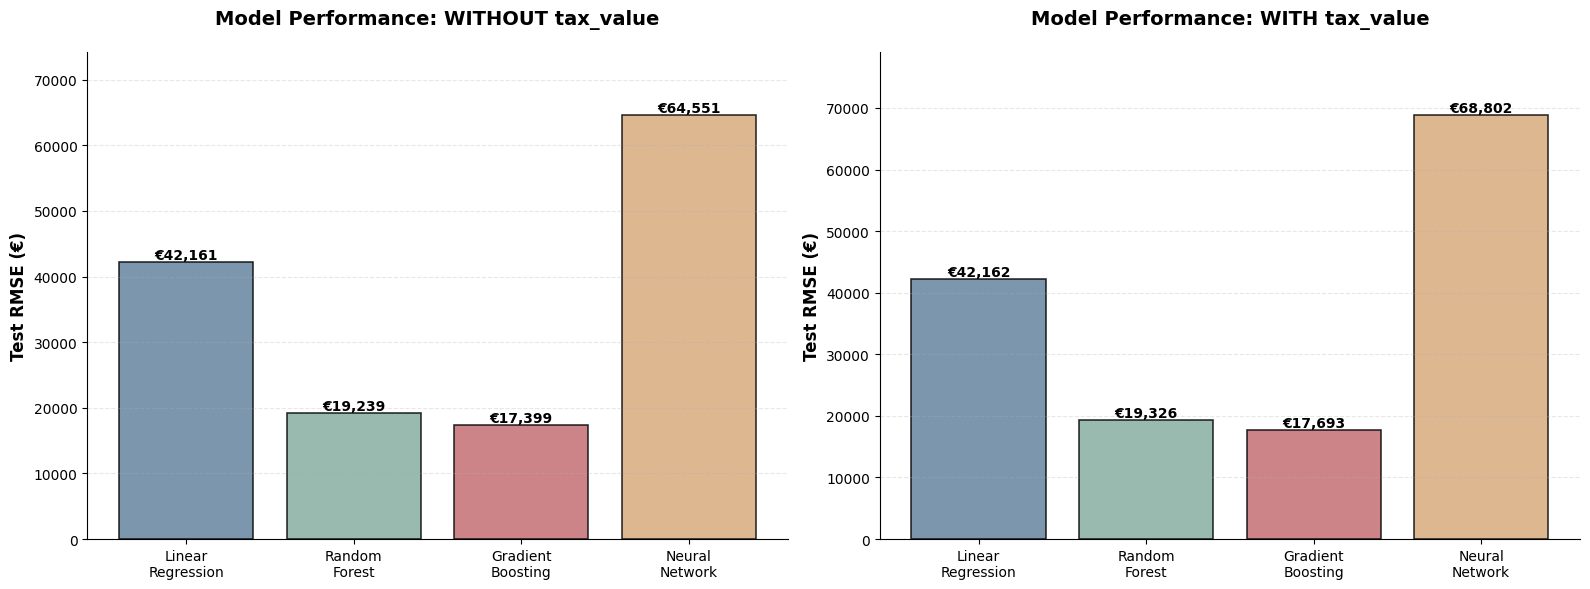

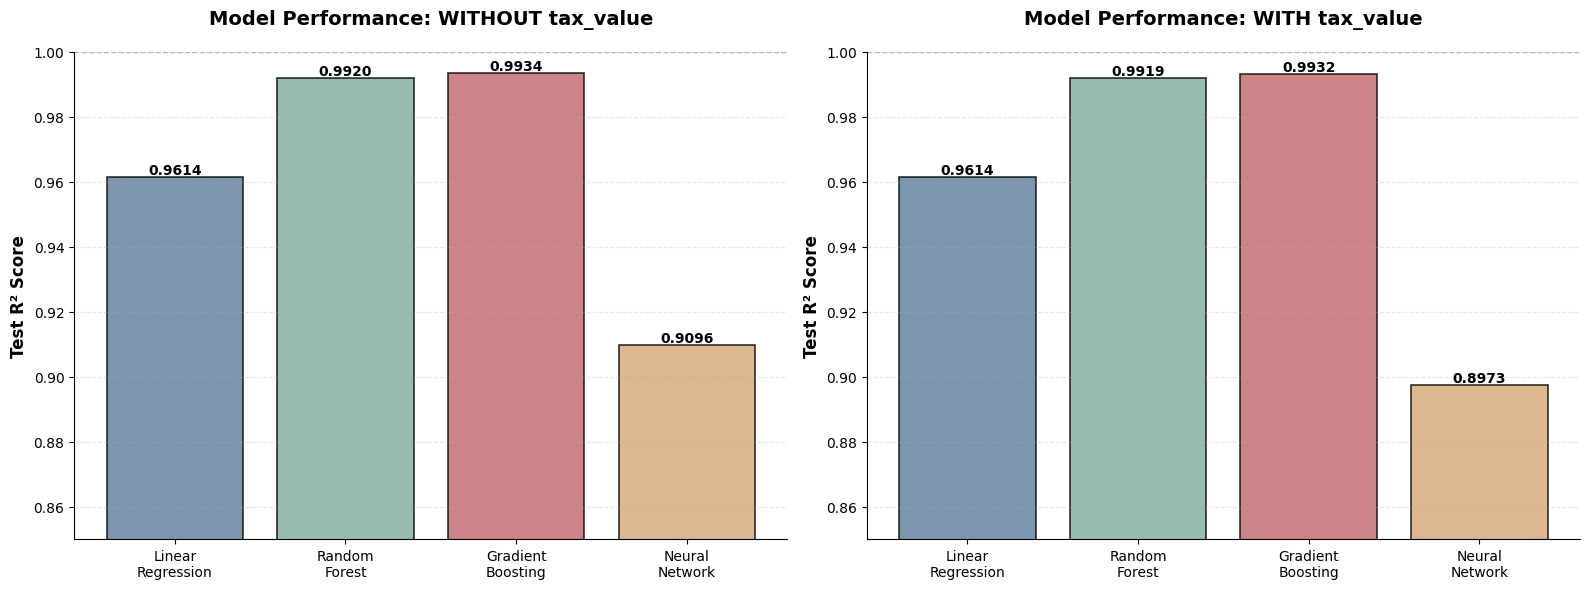

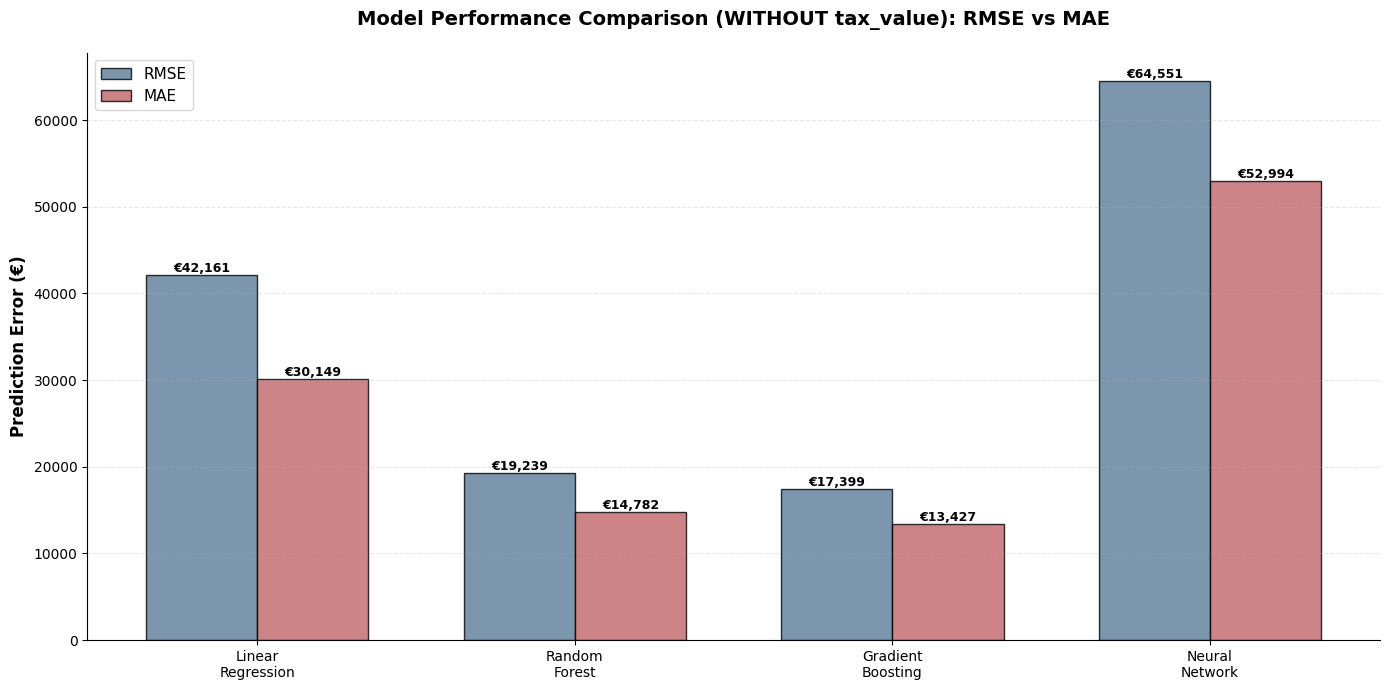

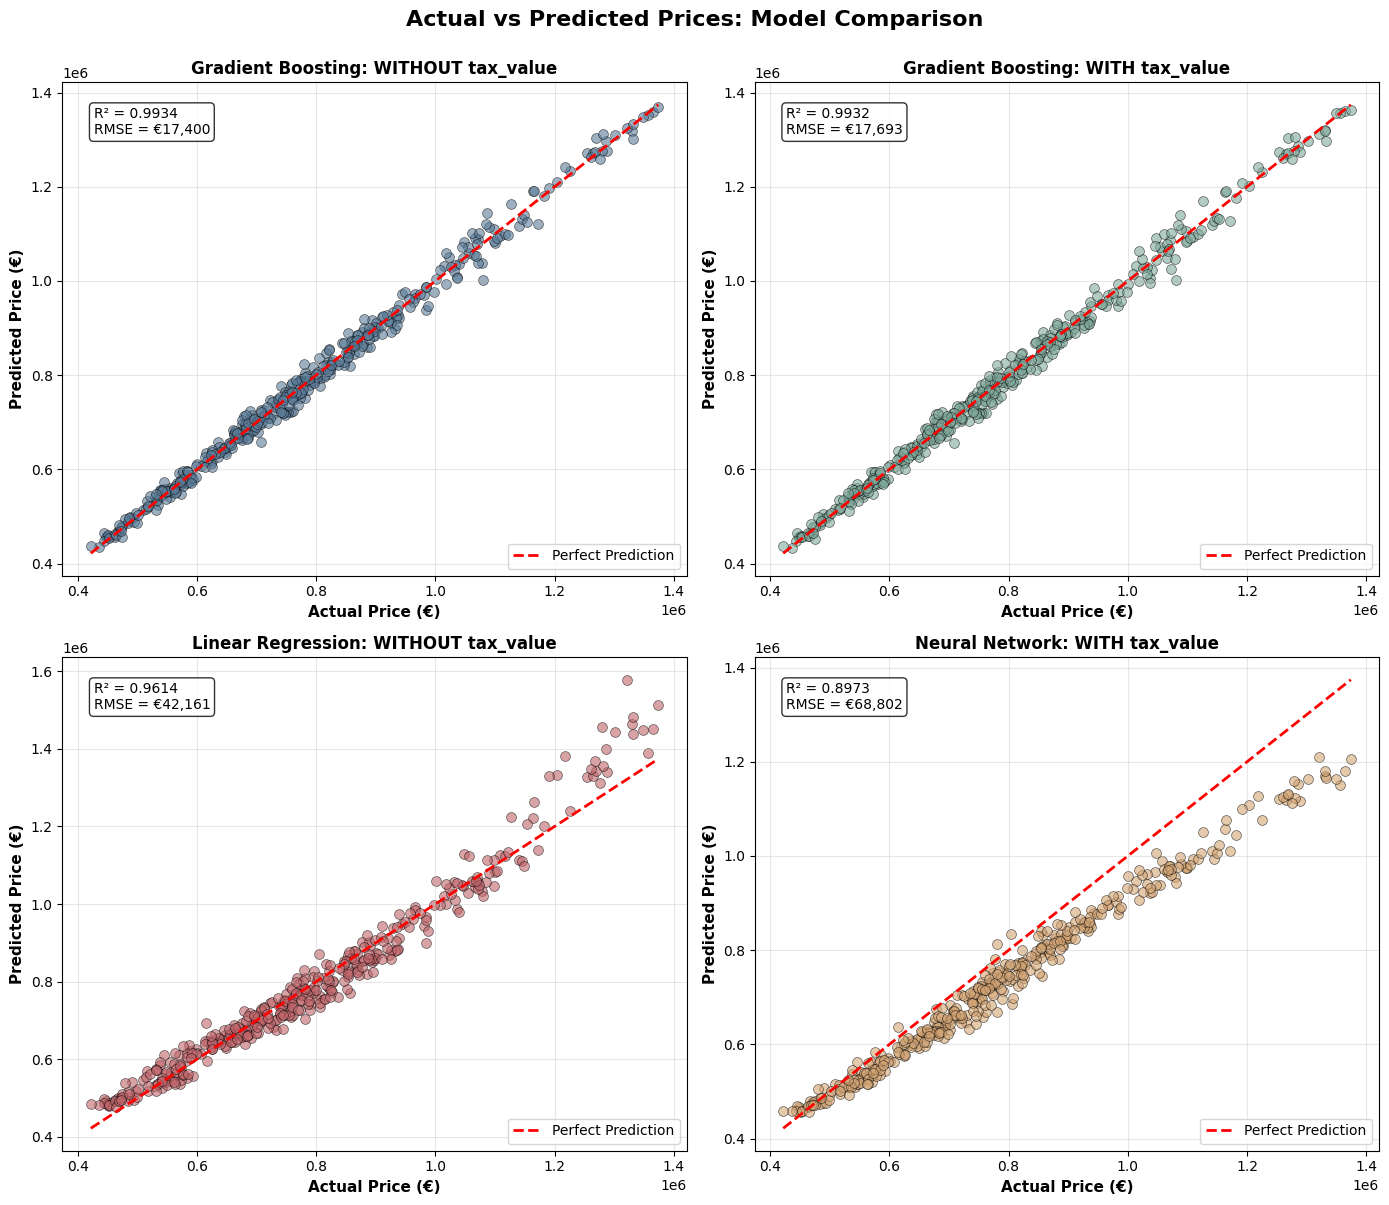

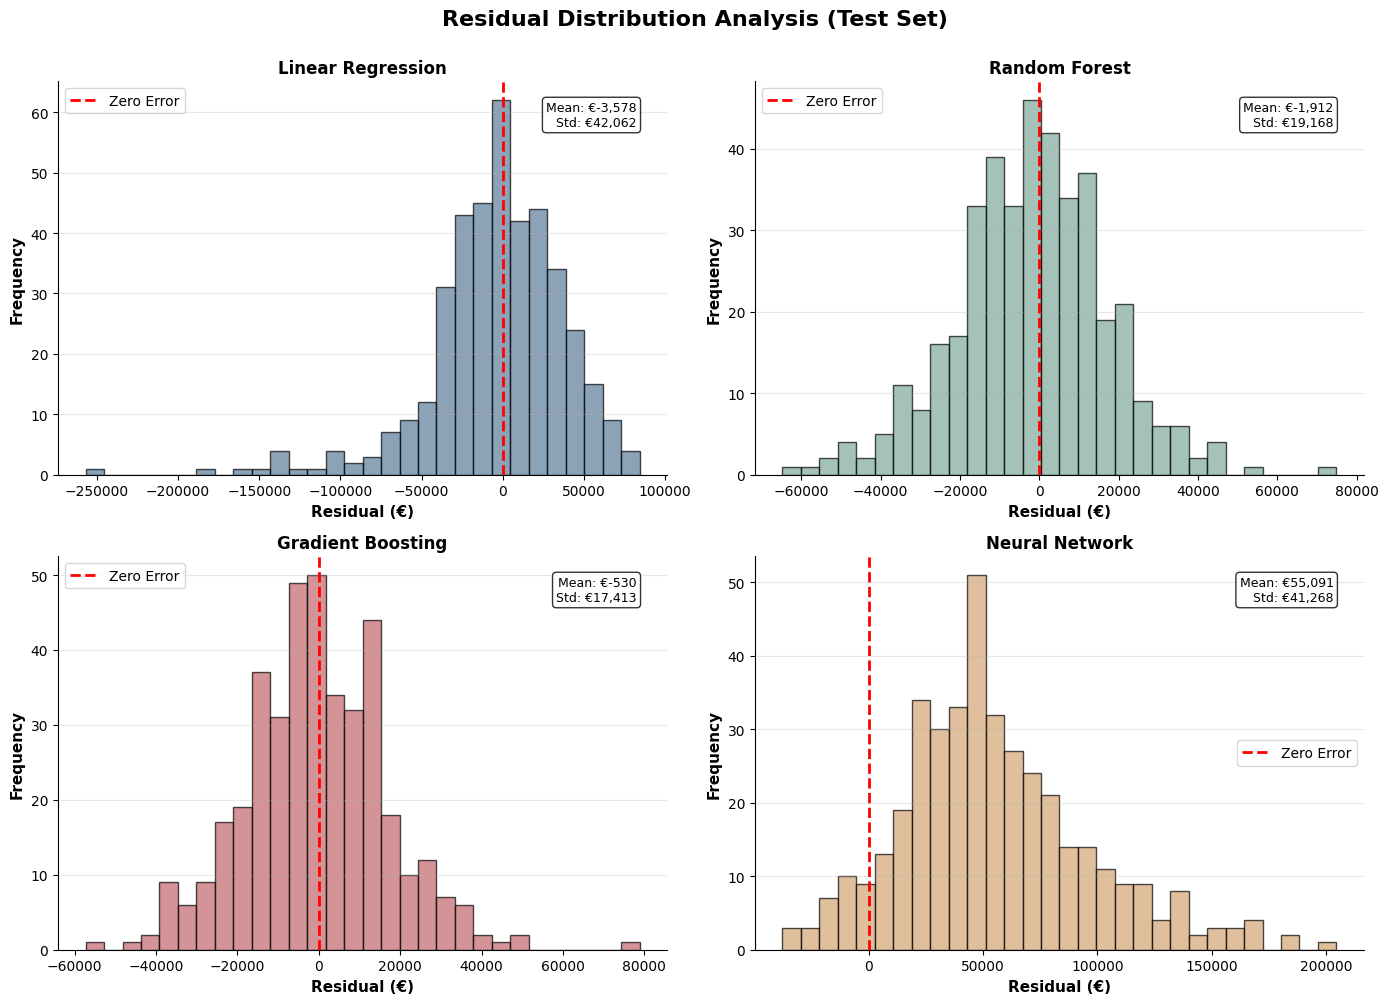


✅ All visualizations created and saved!


In [49]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create outputs directory if it doesn't exist
os.makedirs('/mnt/user-data/outputs', exist_ok=True)

# Set consistent style
plt.style.use('default')
sns.set_palette("husl")

# Model results data (WITHOUT tax_value)
models = ['Linear\nRegression', 'Random\nForest', 'Gradient\nBoosting', 'Neural\nNetwork']
test_rmse_no_tax_all = [test_rmse_no_tax, test_rmse_rf_no_tax, test_rmse_gb_no_tax, results_nn_no_tax['test_rmse']]
test_r2_no_tax_all = [test_r2_no_tax, test_r2_rf_no_tax, test_r2_gb_no_tax, results_nn_no_tax['test_r2']]
test_mae_no_tax_all = [test_mae_no_tax, test_mae_rf_no_tax, test_mae_gb_no_tax, results_nn_no_tax['test_mae']]

# Model results data (WITH tax_value)
test_rmse_with_tax_all = [test_rmse_with_tax, test_rmse_rf_with_tax, test_rmse_gb_with_tax, results_nn_with_tax['test_rmse']]
test_r2_with_tax_all = [test_r2_with_tax, test_r2_rf_with_tax, test_r2_gb_with_tax, results_nn_with_tax['test_r2']]
test_mae_with_tax_all = [test_mae_with_tax, test_mae_rf_with_tax, test_mae_gb_with_tax, results_nn_with_tax['test_mae']]

# Color scheme
colors = ['#5B7C99', '#7FA99B', '#C1666B', '#D4A574']

# 1. RMSE Comparison Bar Chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Without tax_value
bars1 = ax1.bar(models, test_rmse_no_tax_all, color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)
ax1.set_ylabel('Test RMSE (€)', fontsize=12, fontweight='bold')
ax1.set_title('Model Performance: WITHOUT tax_value', fontsize=14, fontweight='bold', pad=20)
ax1.set_ylim(0, max(test_rmse_no_tax_all) * 1.15)
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax1.spines[['top', 'right']].set_visible(False)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'€{int(height):,}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# With tax_value
bars2 = ax2.bar(models, test_rmse_with_tax_all, color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)
ax2.set_ylabel('Test RMSE (€)', fontsize=12, fontweight='bold')
ax2.set_title('Model Performance: WITH tax_value', fontsize=14, fontweight='bold', pad=20)
ax2.set_ylim(0, max(test_rmse_with_tax_all) * 1.15)
ax2.grid(axis='y', linestyle='--', alpha=0.3)
ax2.spines[['top', 'right']].set_visible(False)

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'€{int(height):,}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/model_comparison_rmse.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. R² Comparison Bar Chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Without tax_value
bars1 = ax1.bar(models, test_r2_no_tax_all, color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)
ax1.set_ylabel('Test R² Score', fontsize=12, fontweight='bold')
ax1.set_title('Model Performance: WITHOUT tax_value', fontsize=14, fontweight='bold', pad=20)
ax1.set_ylim(0.85, 1.0)
ax1.axhline(y=1.0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax1.spines[['top', 'right']].set_visible(False)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# With tax_value
bars2 = ax2.bar(models, test_r2_with_tax_all, color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)
ax2.set_ylabel('Test R² Score', fontsize=12, fontweight='bold')
ax2.set_title('Model Performance: WITH tax_value', fontsize=14, fontweight='bold', pad=20)
ax2.set_ylim(0.85, 1.0)
ax2.axhline(y=1.0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax2.grid(axis='y', linestyle='--', alpha=0.3)
ax2.spines[['top', 'right']].set_visible(False)

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/model_comparison_r2.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Grouped Bar Chart - RMSE and MAE Together
fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, test_rmse_no_tax_all, width, label='RMSE',
               color='#5B7C99', alpha=0.8, edgecolor='black', linewidth=1)
bars2 = ax.bar(x + width/2, test_mae_no_tax_all, width, label='MAE',
               color='#C1666B', alpha=0.8, edgecolor='black', linewidth=1)

ax.set_ylabel('Prediction Error (€)', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison (WITHOUT tax_value): RMSE vs MAE',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(fontsize=11, loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.spines[['top', 'right']].set_visible(False)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'€{int(height):,}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/model_comparison_rmse_mae.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Actual vs Predicted Scatter Plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Gradient Boosting - WITHOUT tax
ax = axes[0, 0]
ax.scatter(y_test, y_test_pred_gb_no_tax, alpha=0.6, s=50, color='#5B7C99', edgecolor='black', linewidth=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
ax.set_xlabel('Actual Price (€)', fontsize=11, fontweight='bold')
ax.set_ylabel('Predicted Price (€)', fontsize=11, fontweight='bold')
ax.set_title('Gradient Boosting: WITHOUT tax_value', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
ax.text(0.05, 0.95, f'R² = {test_r2_gb_no_tax:.4f}\nRMSE = €{test_rmse_gb_no_tax:,.0f}',
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Gradient Boosting - WITH tax
ax = axes[0, 1]
ax.scatter(y_test, y_test_pred_gb_with_tax, alpha=0.6, s=50, color='#7FA99B', edgecolor='black', linewidth=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
ax.set_xlabel('Actual Price (€)', fontsize=11, fontweight='bold')
ax.set_ylabel('Predicted Price (€)', fontsize=11, fontweight='bold')
ax.set_title('Gradient Boosting: WITH tax_value', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
ax.text(0.05, 0.95, f'R² = {test_r2_gb_with_tax:.4f}\nRMSE = €{test_rmse_gb_with_tax:,.0f}',
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Linear Regression - WITHOUT tax
ax = axes[1, 0]
ax.scatter(y_test, y_test_pred_no_tax, alpha=0.6, s=50, color='#C1666B', edgecolor='black', linewidth=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
ax.set_xlabel('Actual Price (€)', fontsize=11, fontweight='bold')
ax.set_ylabel('Predicted Price (€)', fontsize=11, fontweight='bold')
ax.set_title('Linear Regression: WITHOUT tax_value', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
ax.text(0.05, 0.95, f'R² = {test_r2_no_tax:.4f}\nRMSE = €{test_rmse_no_tax:,.0f}',
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Neural Network - WITH tax
ax = axes[1, 1]
y_test_pred_nn_with_tax = np.expm1(results_nn_with_tax['model'](
    torch.FloatTensor(X_test_scaled_with_tax).to(device)
).detach().cpu().numpy().flatten())
ax.scatter(y_test, y_test_pred_nn_with_tax, alpha=0.6, s=50, color='#D4A574', edgecolor='black', linewidth=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
ax.set_xlabel('Actual Price (€)', fontsize=11, fontweight='bold')
ax.set_ylabel('Predicted Price (€)', fontsize=11, fontweight='bold')
ax.set_title('Neural Network: WITH tax_value', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
ax.text(0.05, 0.95, f'R² = {results_nn_with_tax["test_r2"]:.4f}\nRMSE = €{results_nn_with_tax["test_rmse"]:,.0f}',
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Actual vs Predicted Prices: Model Comparison', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/actual_vs_predicted_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Residual Distribution Comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Calculate residuals
residuals_lr = y_test - y_test_pred_no_tax
residuals_gb = y_test - y_test_pred_gb_no_tax
residuals_rf = y_test - y_test_pred_rf_no_tax
residuals_nn = y_test - y_test_pred_nn_with_tax

residuals_data = [residuals_lr, residuals_rf, residuals_gb, residuals_nn]
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network']

for ax, residuals, model_name, color in zip(axes.flatten(), residuals_data, model_names, colors):
    ax.hist(residuals, bins=30, color=color, alpha=0.7, edgecolor='black', linewidth=1)
    ax.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
    ax.set_xlabel('Residual (€)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=11, fontweight='bold')
    ax.set_title(f'{model_name}', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    ax.spines[['top', 'right']].set_visible(False)

    # Add statistics
    mean_res = residuals.mean()
    std_res = residuals.std()
    ax.text(0.95, 0.95, f'Mean: €{mean_res:,.0f}\nStd: €{std_res:,.0f}',
            transform=ax.transAxes, fontsize=9, verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Residual Distribution Analysis (Test Set)', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/residual_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ All visualizations created and saved!")

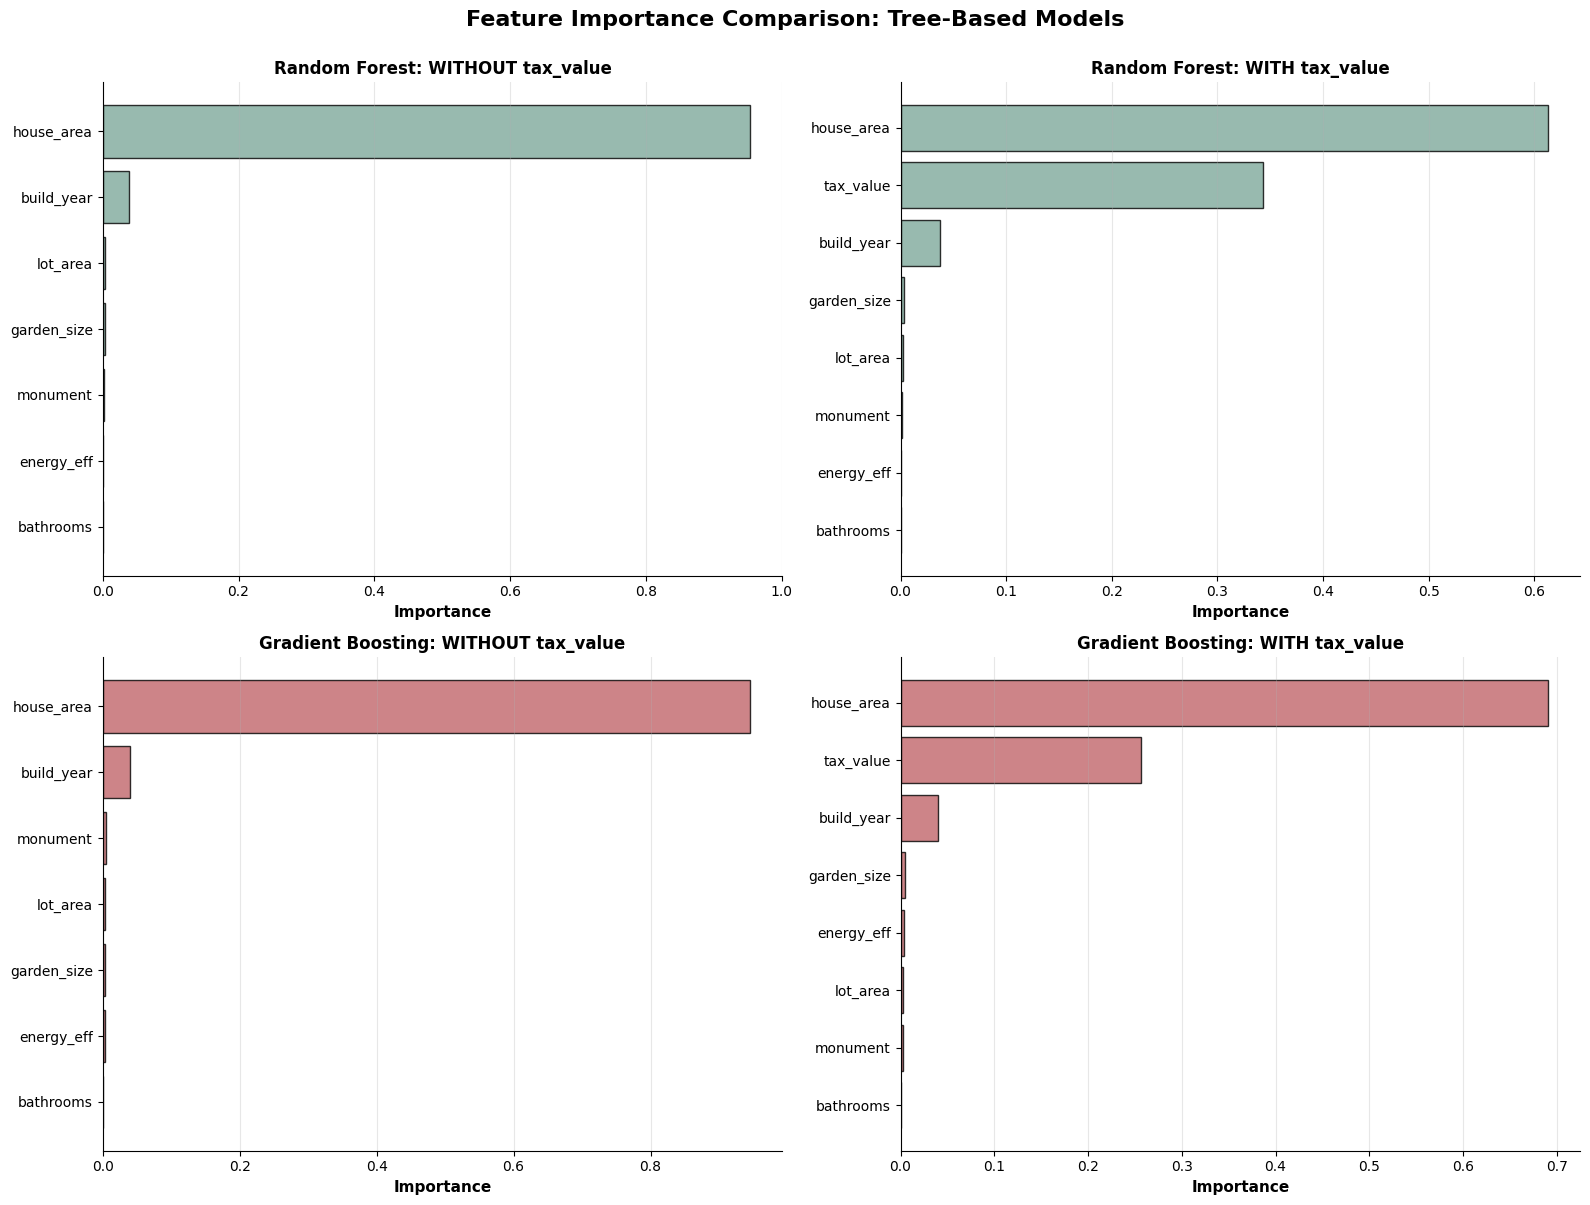

✅ Feature importance visualization created!


In [50]:
# Recreate feature importance dataframes
feature_importance_rf_no_tax = pd.DataFrame({
    'Feature': features_without_tax,
    'Importance': rf_no_tax.feature_importances_
}).sort_values('Importance', ascending=False)

feature_importance_rf_with_tax = pd.DataFrame({
    'Feature': features_with_tax,
    'Importance': rf_with_tax.feature_importances_
}).sort_values('Importance', ascending=False)

feature_importance_gb_no_tax = pd.DataFrame({
    'Feature': features_without_tax,
    'Importance': gb_no_tax.feature_importances_
}).sort_values('Importance', ascending=False)

feature_importance_gb_with_tax = pd.DataFrame({
    'Feature': features_with_tax,
    'Importance': gb_with_tax.feature_importances_
}).sort_values('Importance', ascending=False)

# Create feature importance plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Random Forest - WITHOUT tax_value
ax = axes[0, 0]
importance_rf_no_tax = feature_importance_rf_no_tax.sort_values('Importance', ascending=True)
ax.barh(importance_rf_no_tax['Feature'], importance_rf_no_tax['Importance'],
        color='#7FA99B', alpha=0.8, edgecolor='black', linewidth=1)
ax.set_xlabel('Importance', fontsize=11, fontweight='bold')
ax.set_title('Random Forest: WITHOUT tax_value', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.spines[['top', 'right']].set_visible(False)

# Random Forest - WITH tax_value
ax = axes[0, 1]
importance_rf_with_tax = feature_importance_rf_with_tax.sort_values('Importance', ascending=True)
ax.barh(importance_rf_with_tax['Feature'], importance_rf_with_tax['Importance'],
        color='#7FA99B', alpha=0.8, edgecolor='black', linewidth=1)
ax.set_xlabel('Importance', fontsize=11, fontweight='bold')
ax.set_title('Random Forest: WITH tax_value', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.spines[['top', 'right']].set_visible(False)

# Gradient Boosting - WITHOUT tax_value
ax = axes[1, 0]
importance_gb_no_tax = feature_importance_gb_no_tax.sort_values('Importance', ascending=True)
ax.barh(importance_gb_no_tax['Feature'], importance_gb_no_tax['Importance'],
        color='#C1666B', alpha=0.8, edgecolor='black', linewidth=1)
ax.set_xlabel('Importance', fontsize=11, fontweight='bold')
ax.set_title('Gradient Boosting: WITHOUT tax_value', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.spines[['top', 'right']].set_visible(False)

# Gradient Boosting - WITH tax_value
ax = axes[1, 1]
importance_gb_with_tax = feature_importance_gb_with_tax.sort_values('Importance', ascending=True)
ax.barh(importance_gb_with_tax['Feature'], importance_gb_with_tax['Importance'],
        color='#C1666B', alpha=0.8, edgecolor='black', linewidth=1)
ax.set_xlabel('Importance', fontsize=11, fontweight='bold')
ax.set_title('Gradient Boosting: WITH tax_value', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.spines[['top', 'right']].set_visible(False)

plt.suptitle('Feature Importance Comparison: Tree-Based Models',
             fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/feature_importance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Feature importance visualization created!")

Displaying: /mnt/user-data/outputs/model_comparison_rmse.png


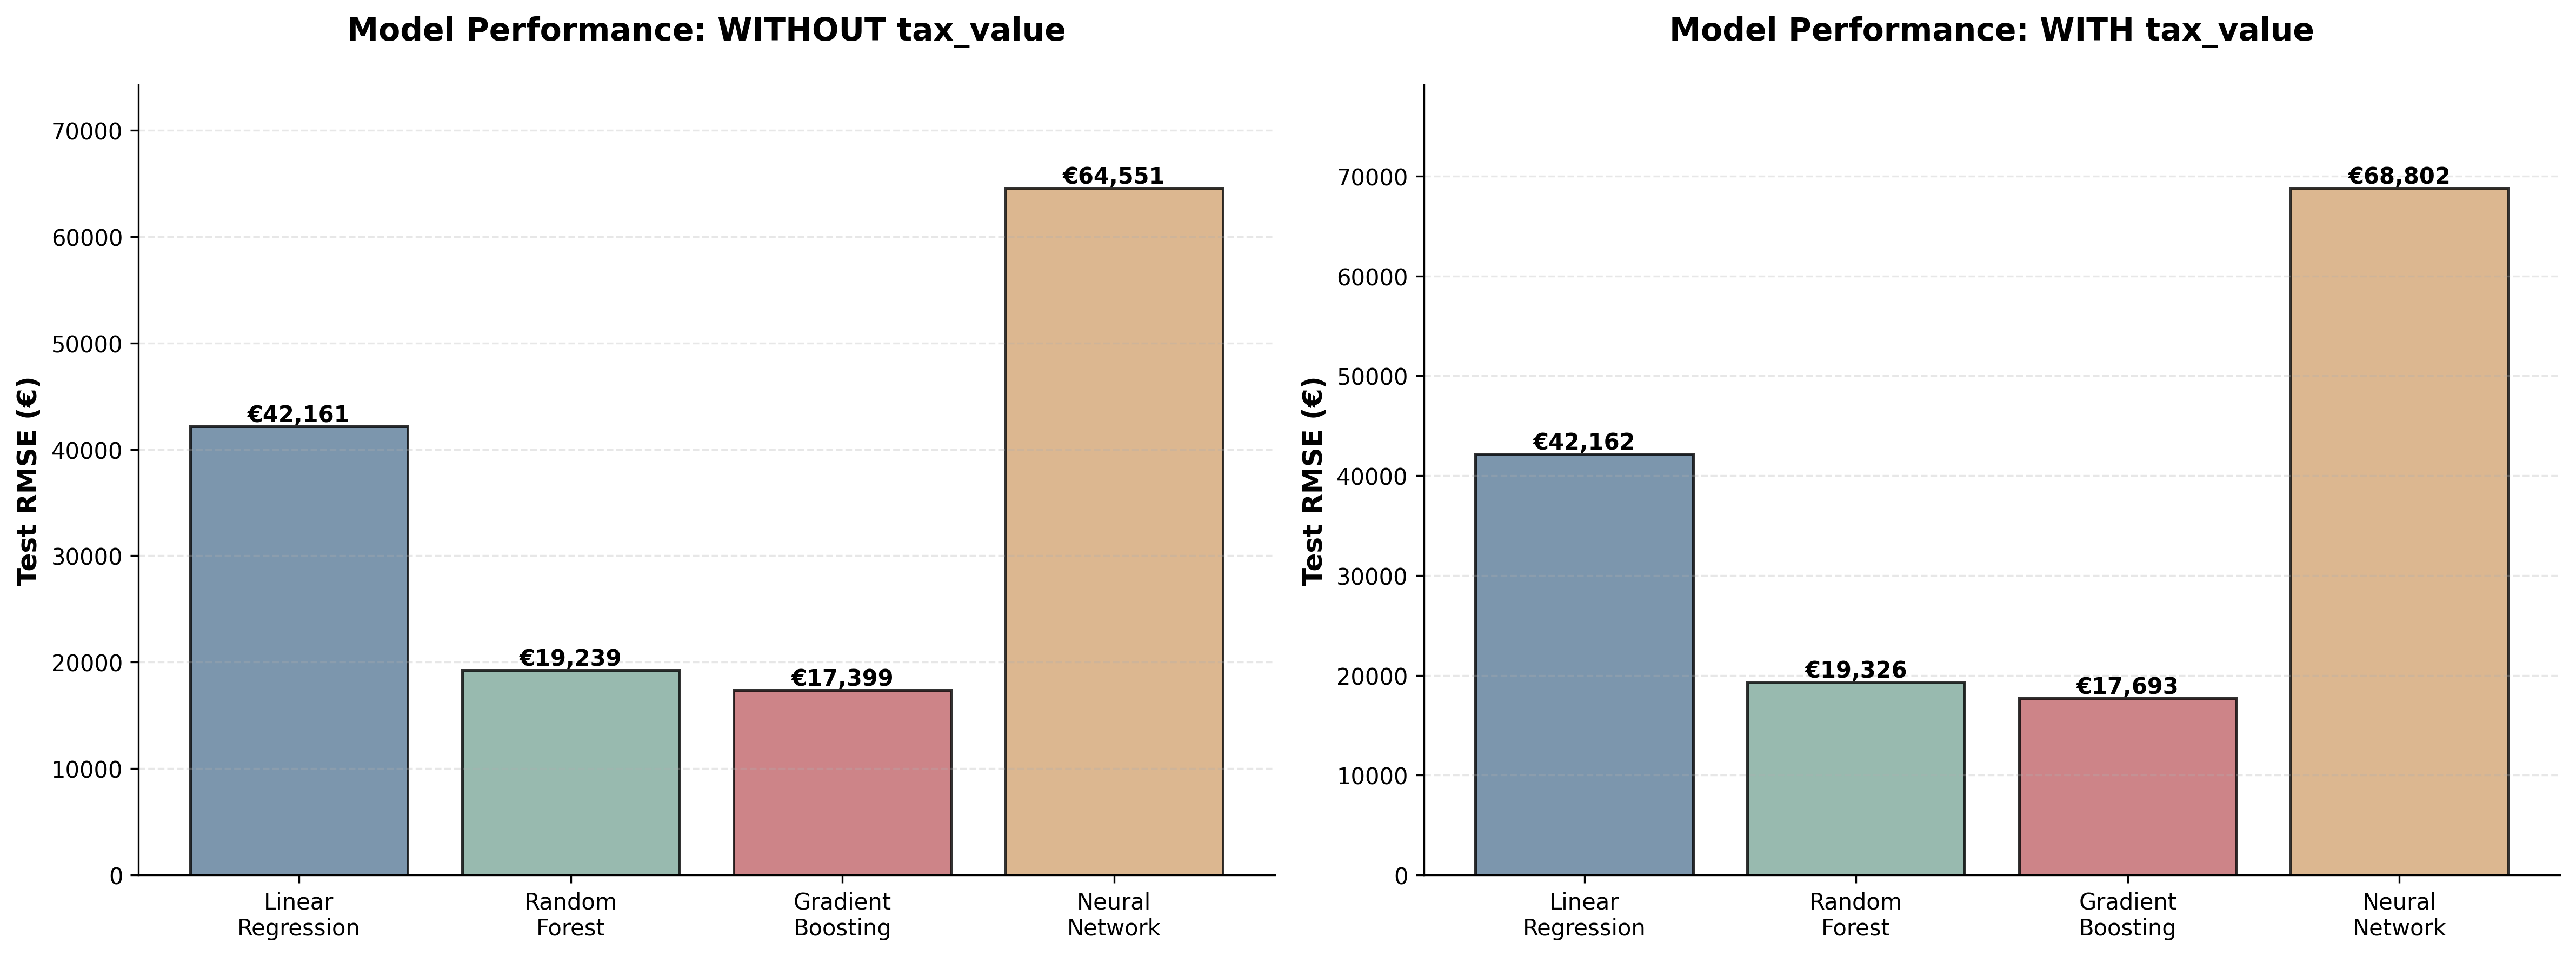

Displaying: /mnt/user-data/outputs/model_comparison_r2.png


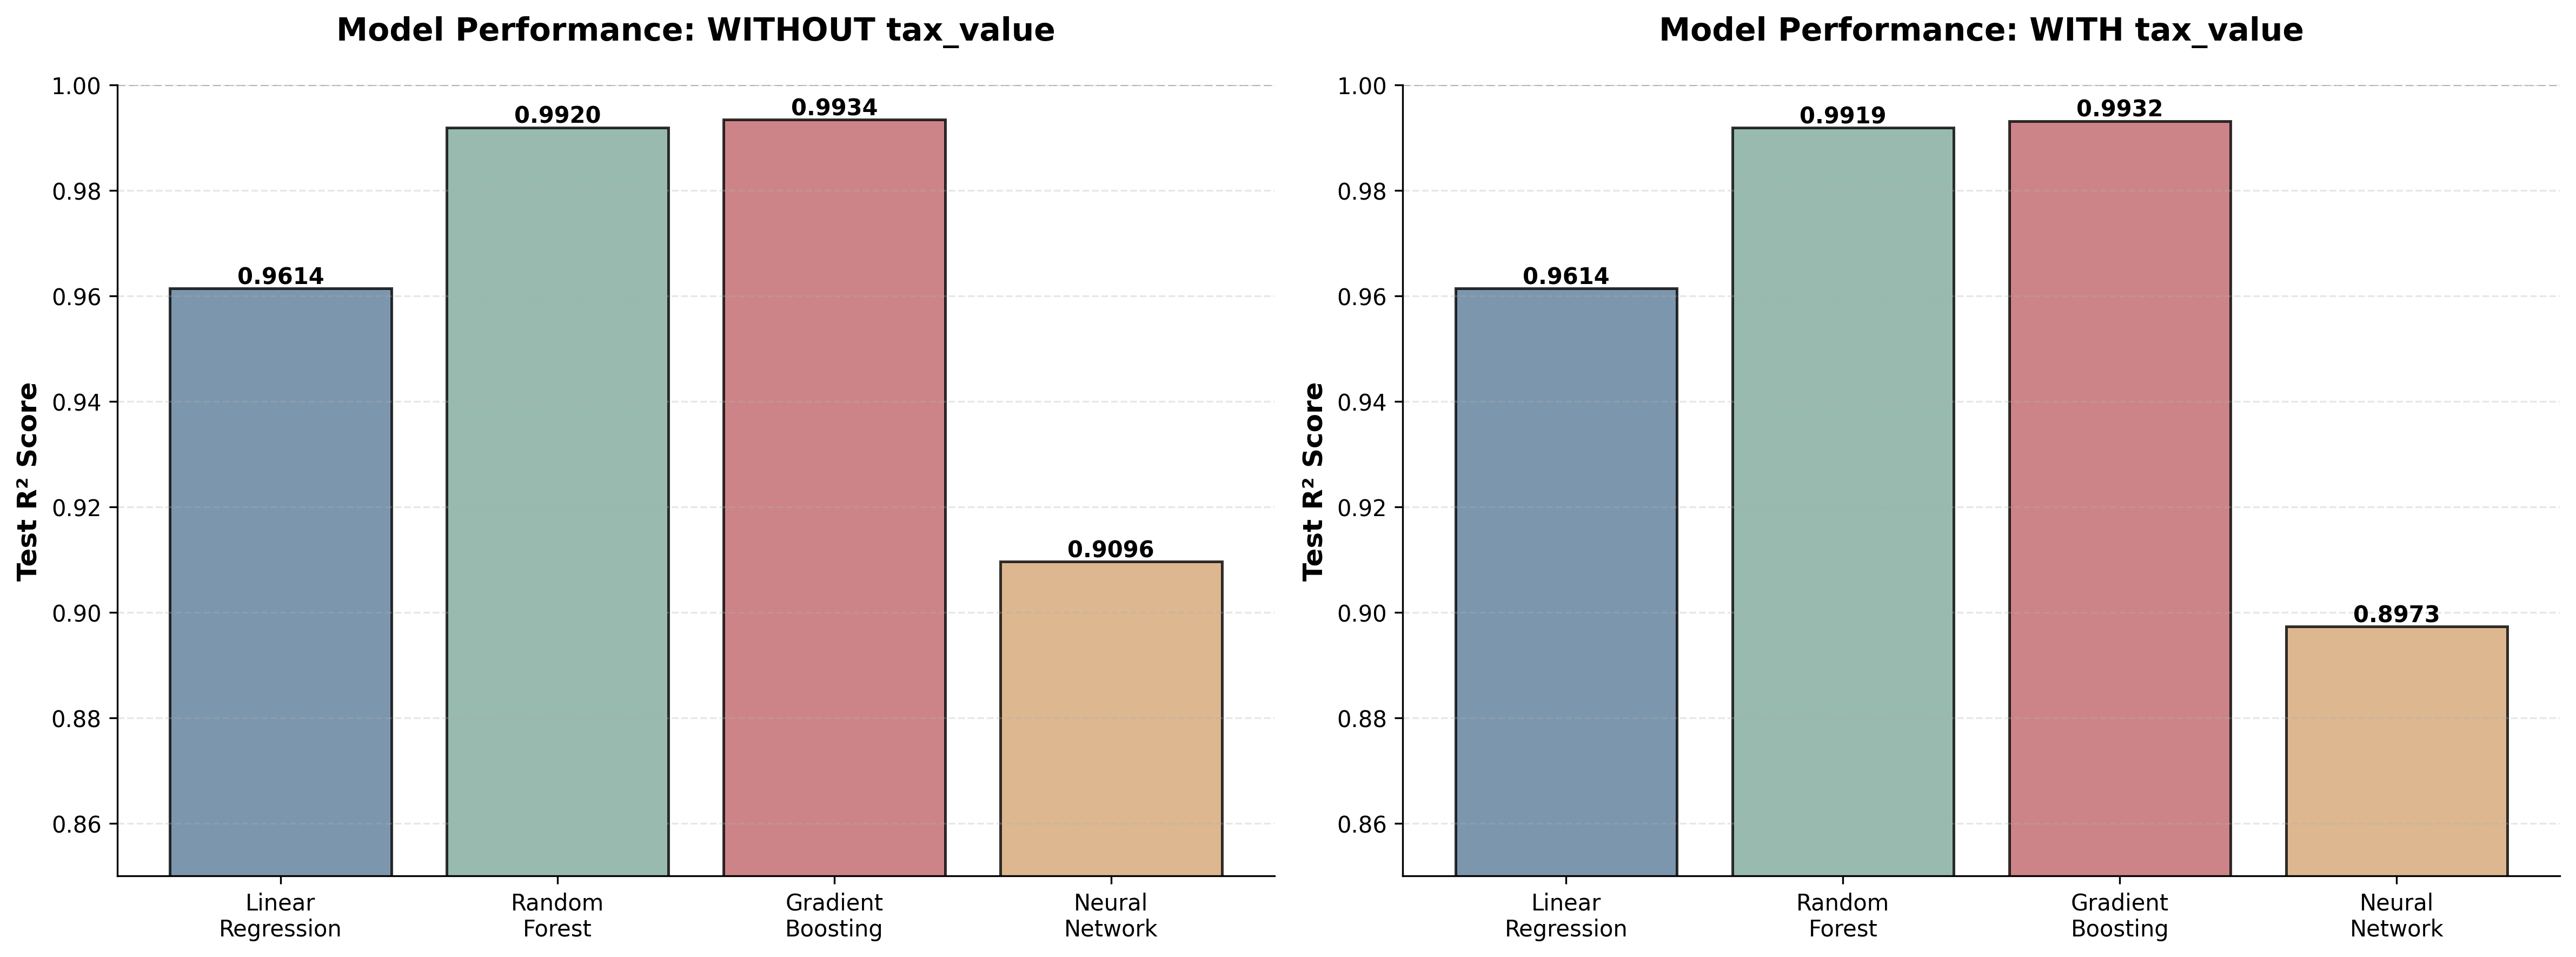

Displaying: /mnt/user-data/outputs/model_comparison_rmse_mae.png


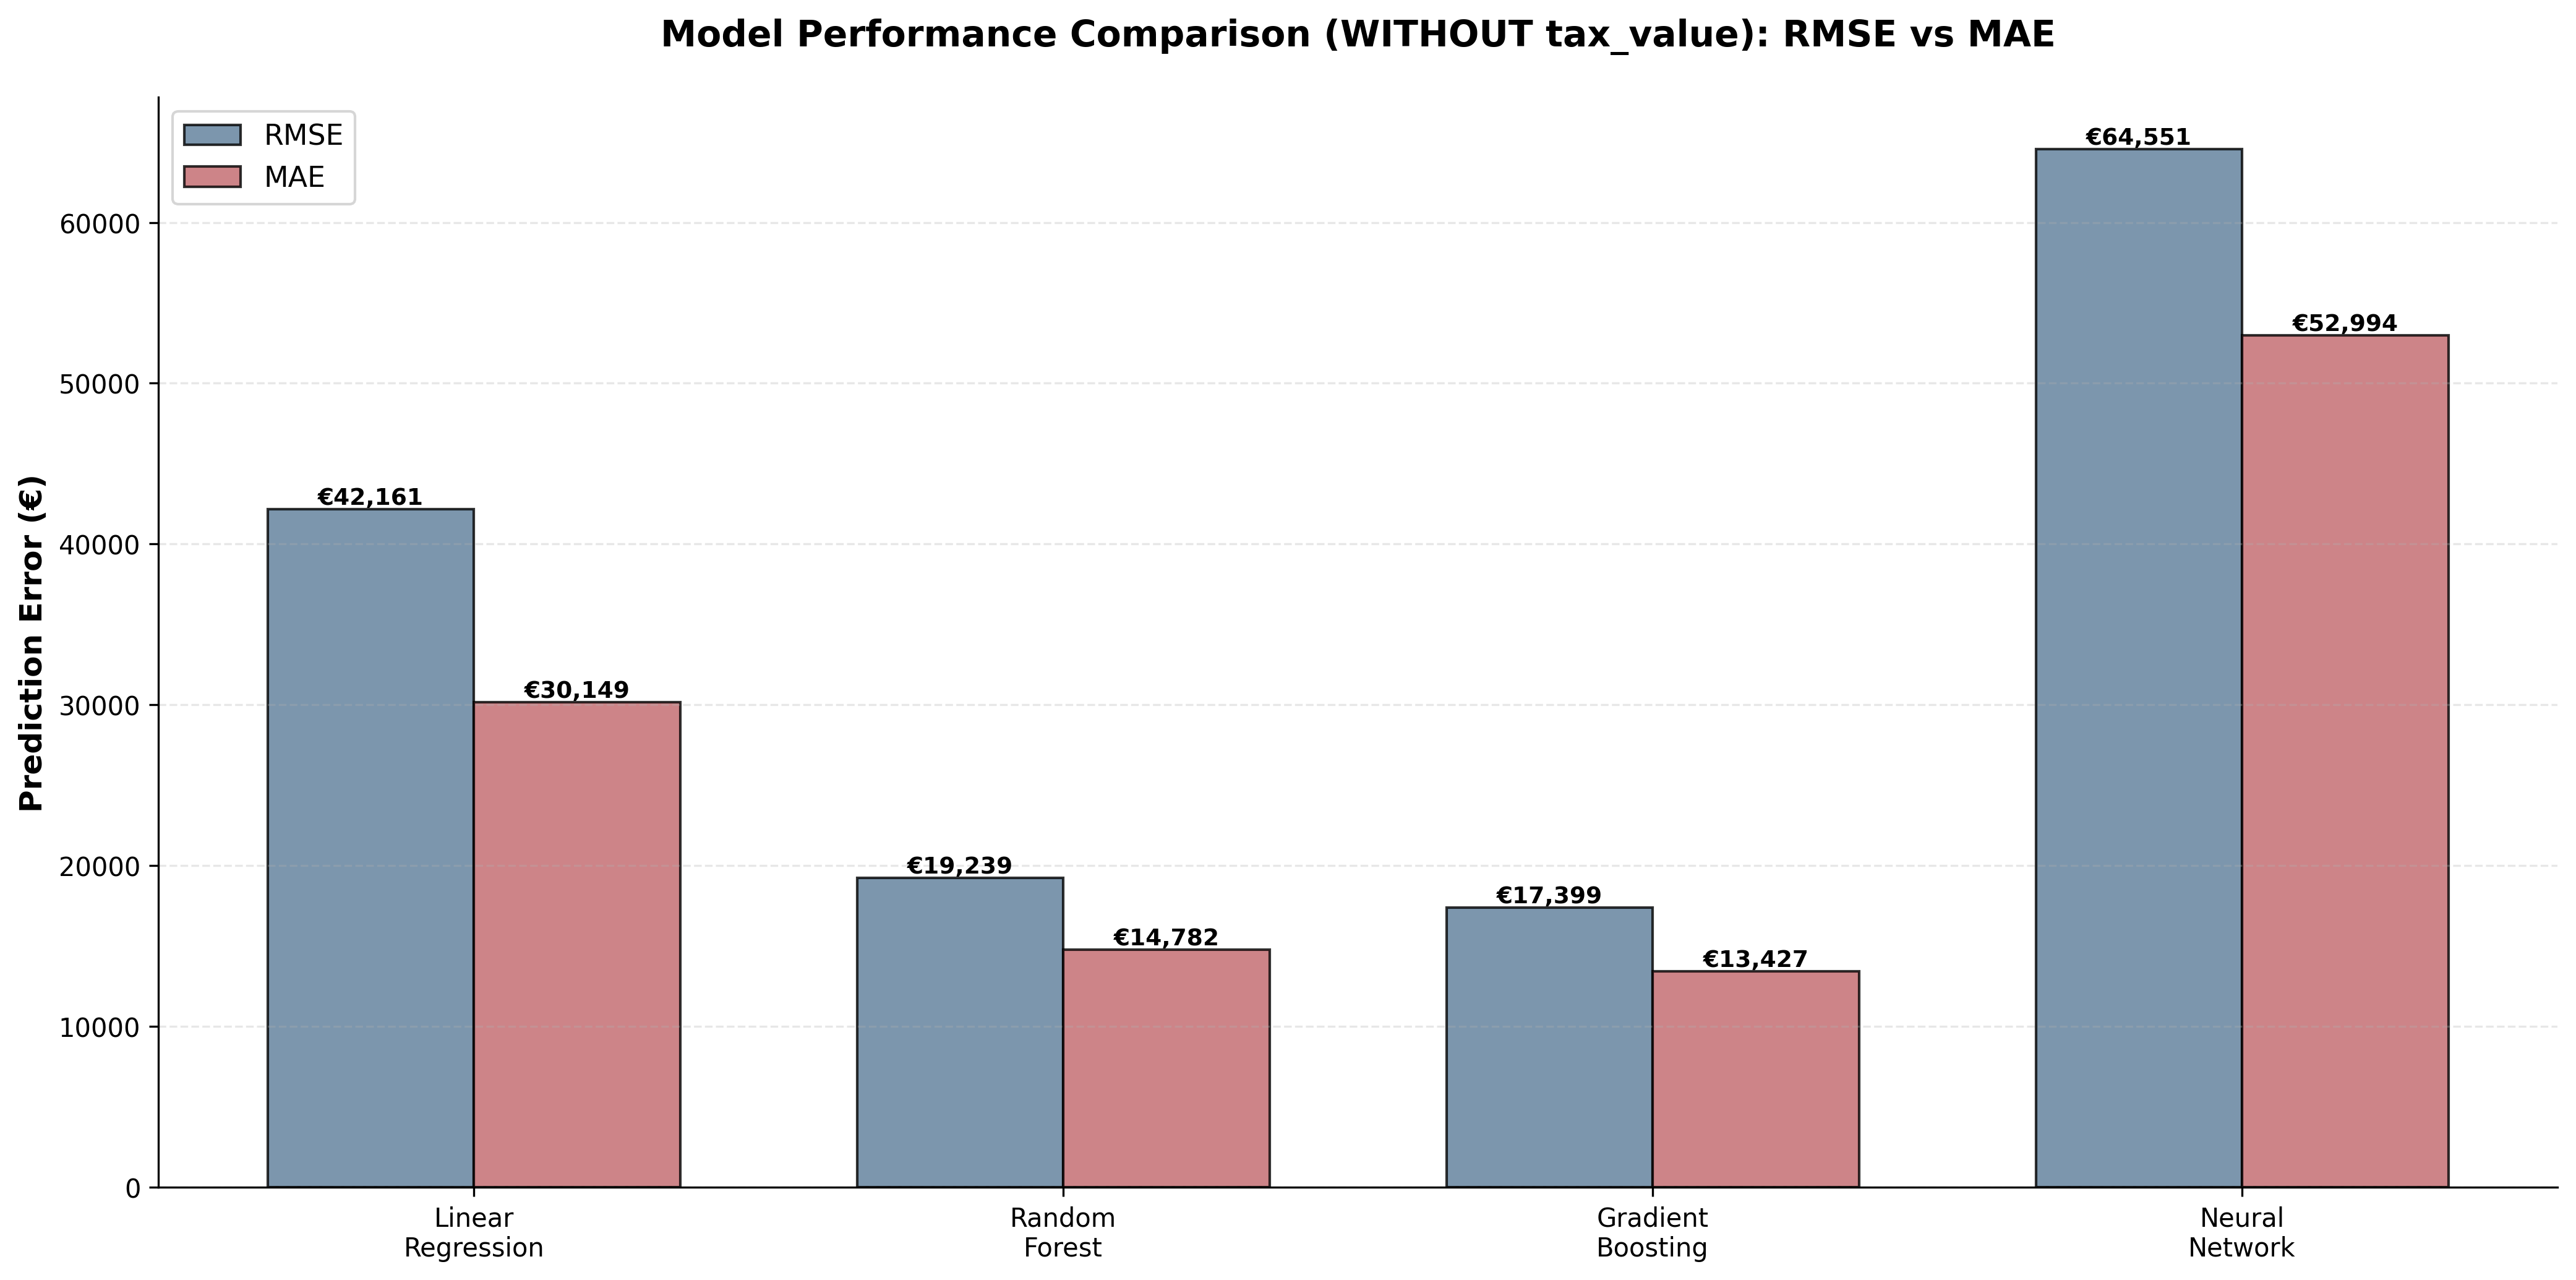

Displaying: /mnt/user-data/outputs/actual_vs_predicted_comparison.png


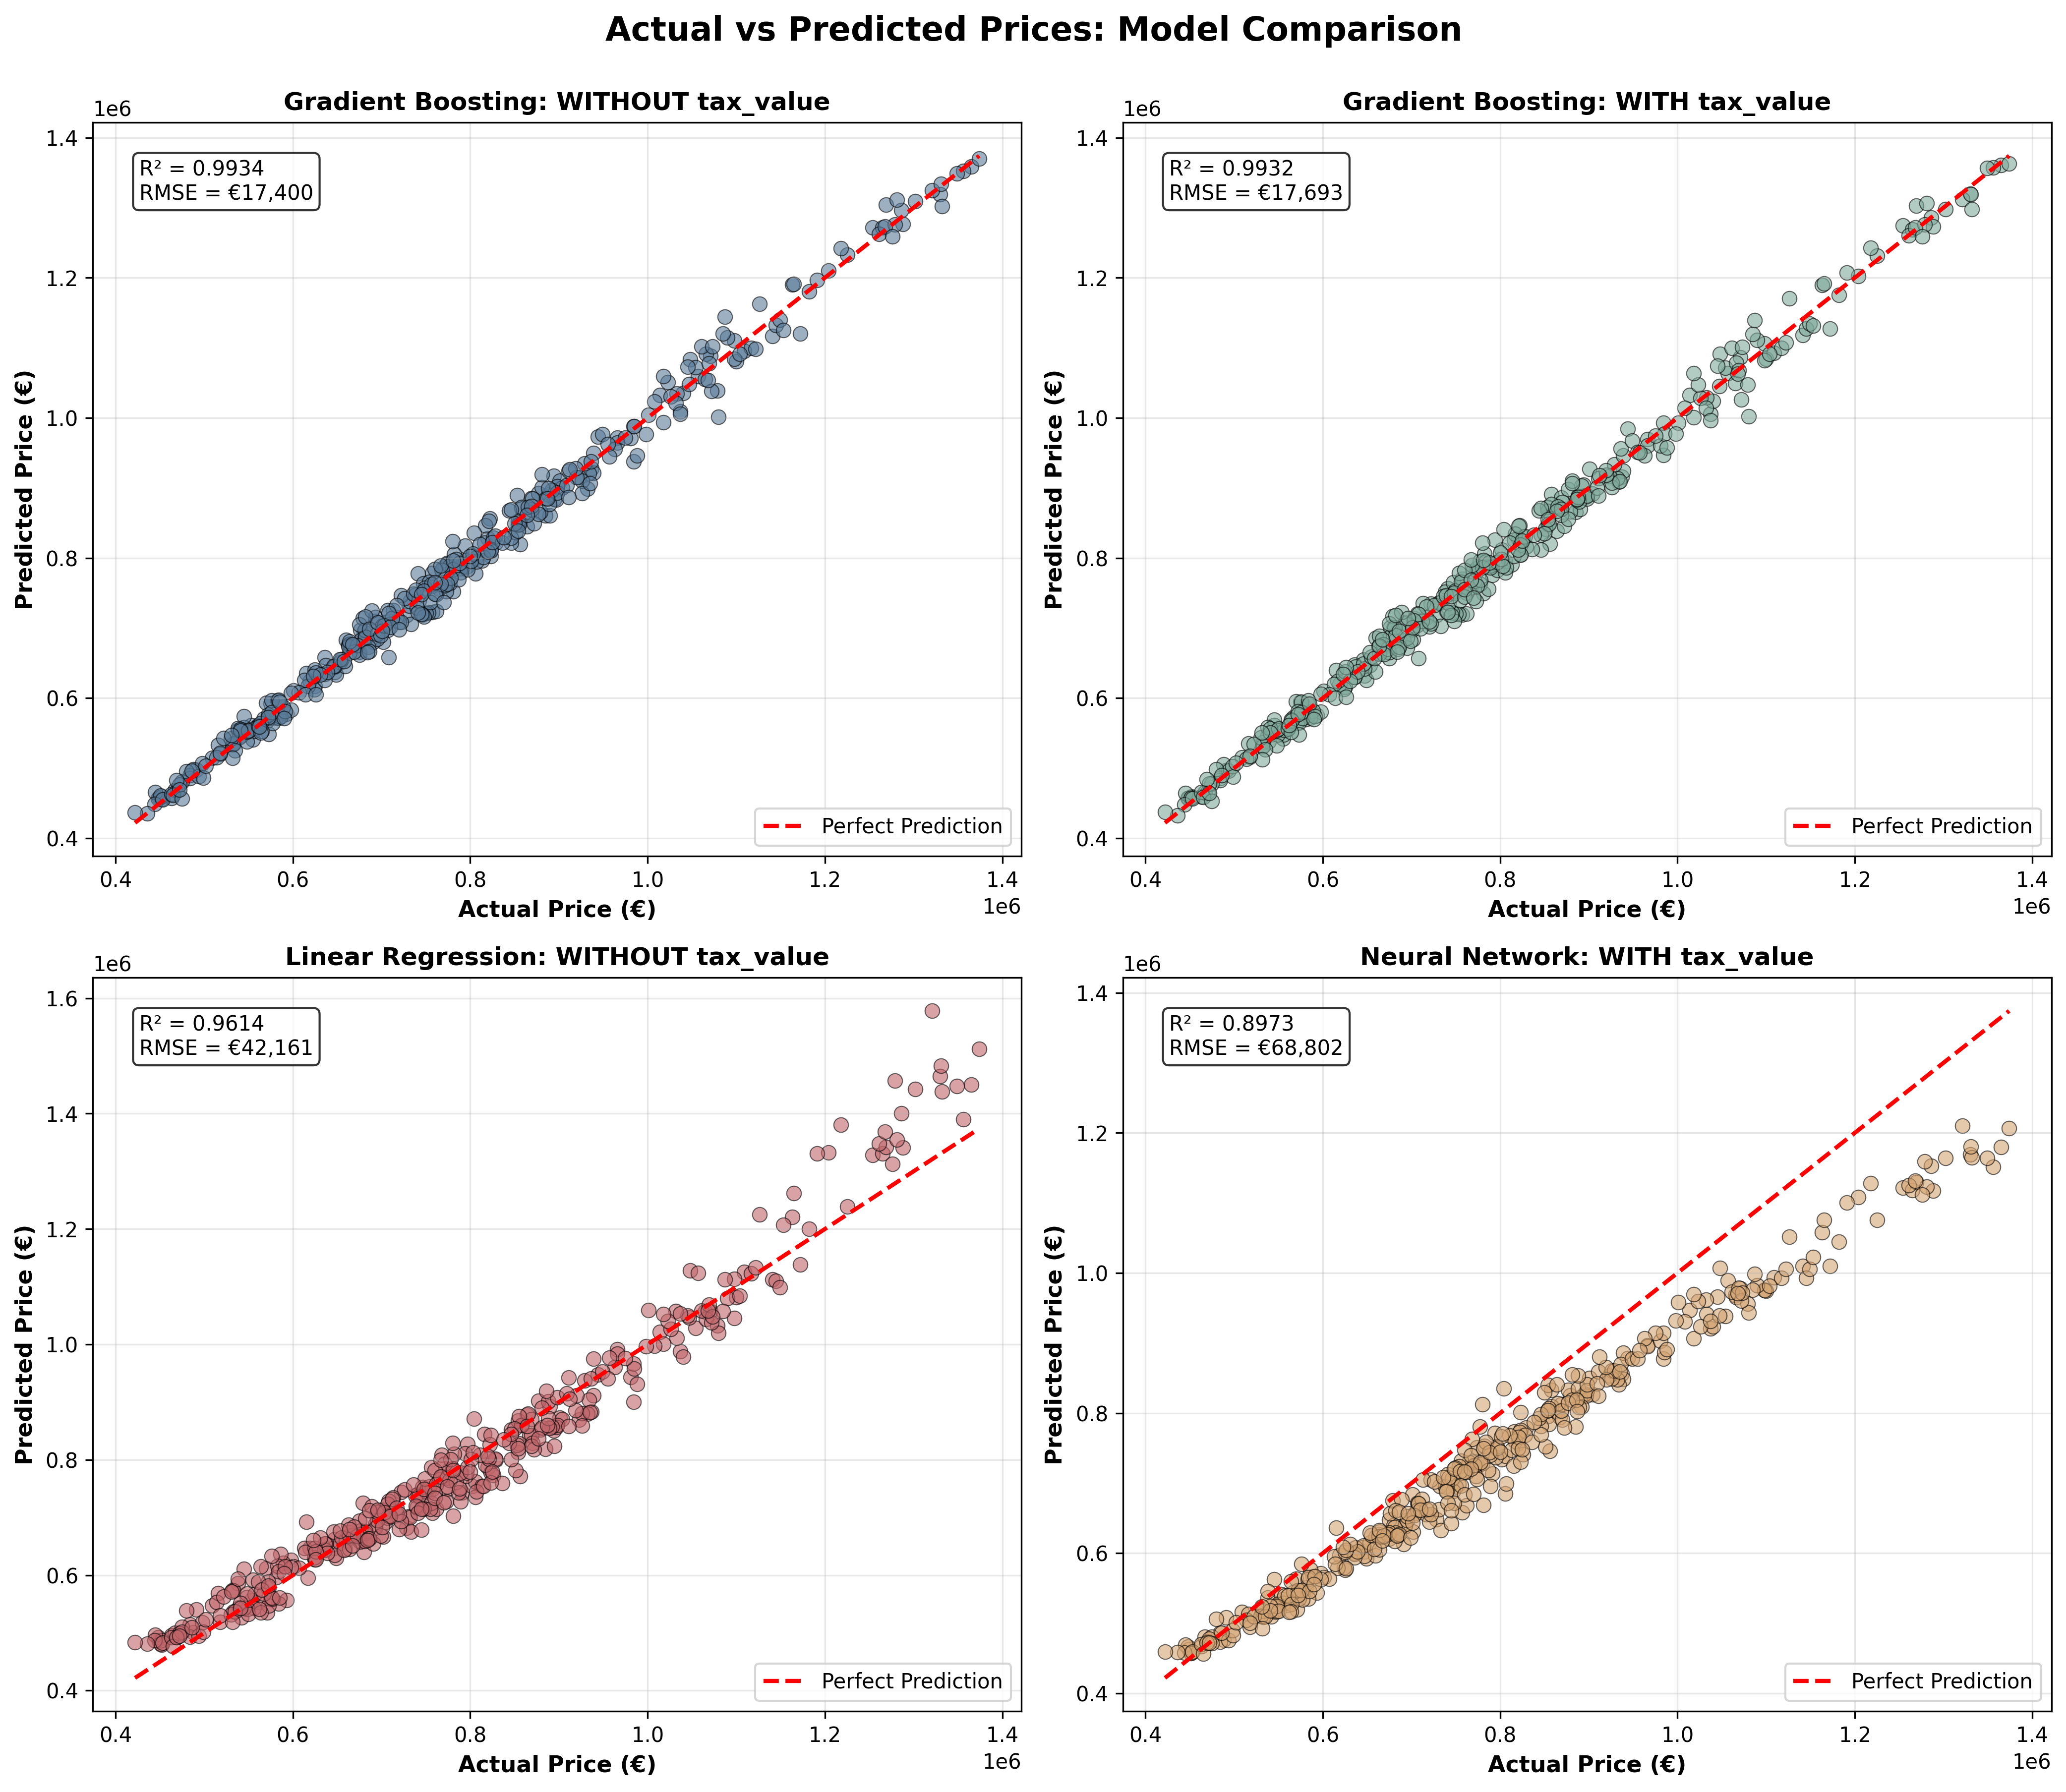

Displaying: /mnt/user-data/outputs/residual_distributions.png


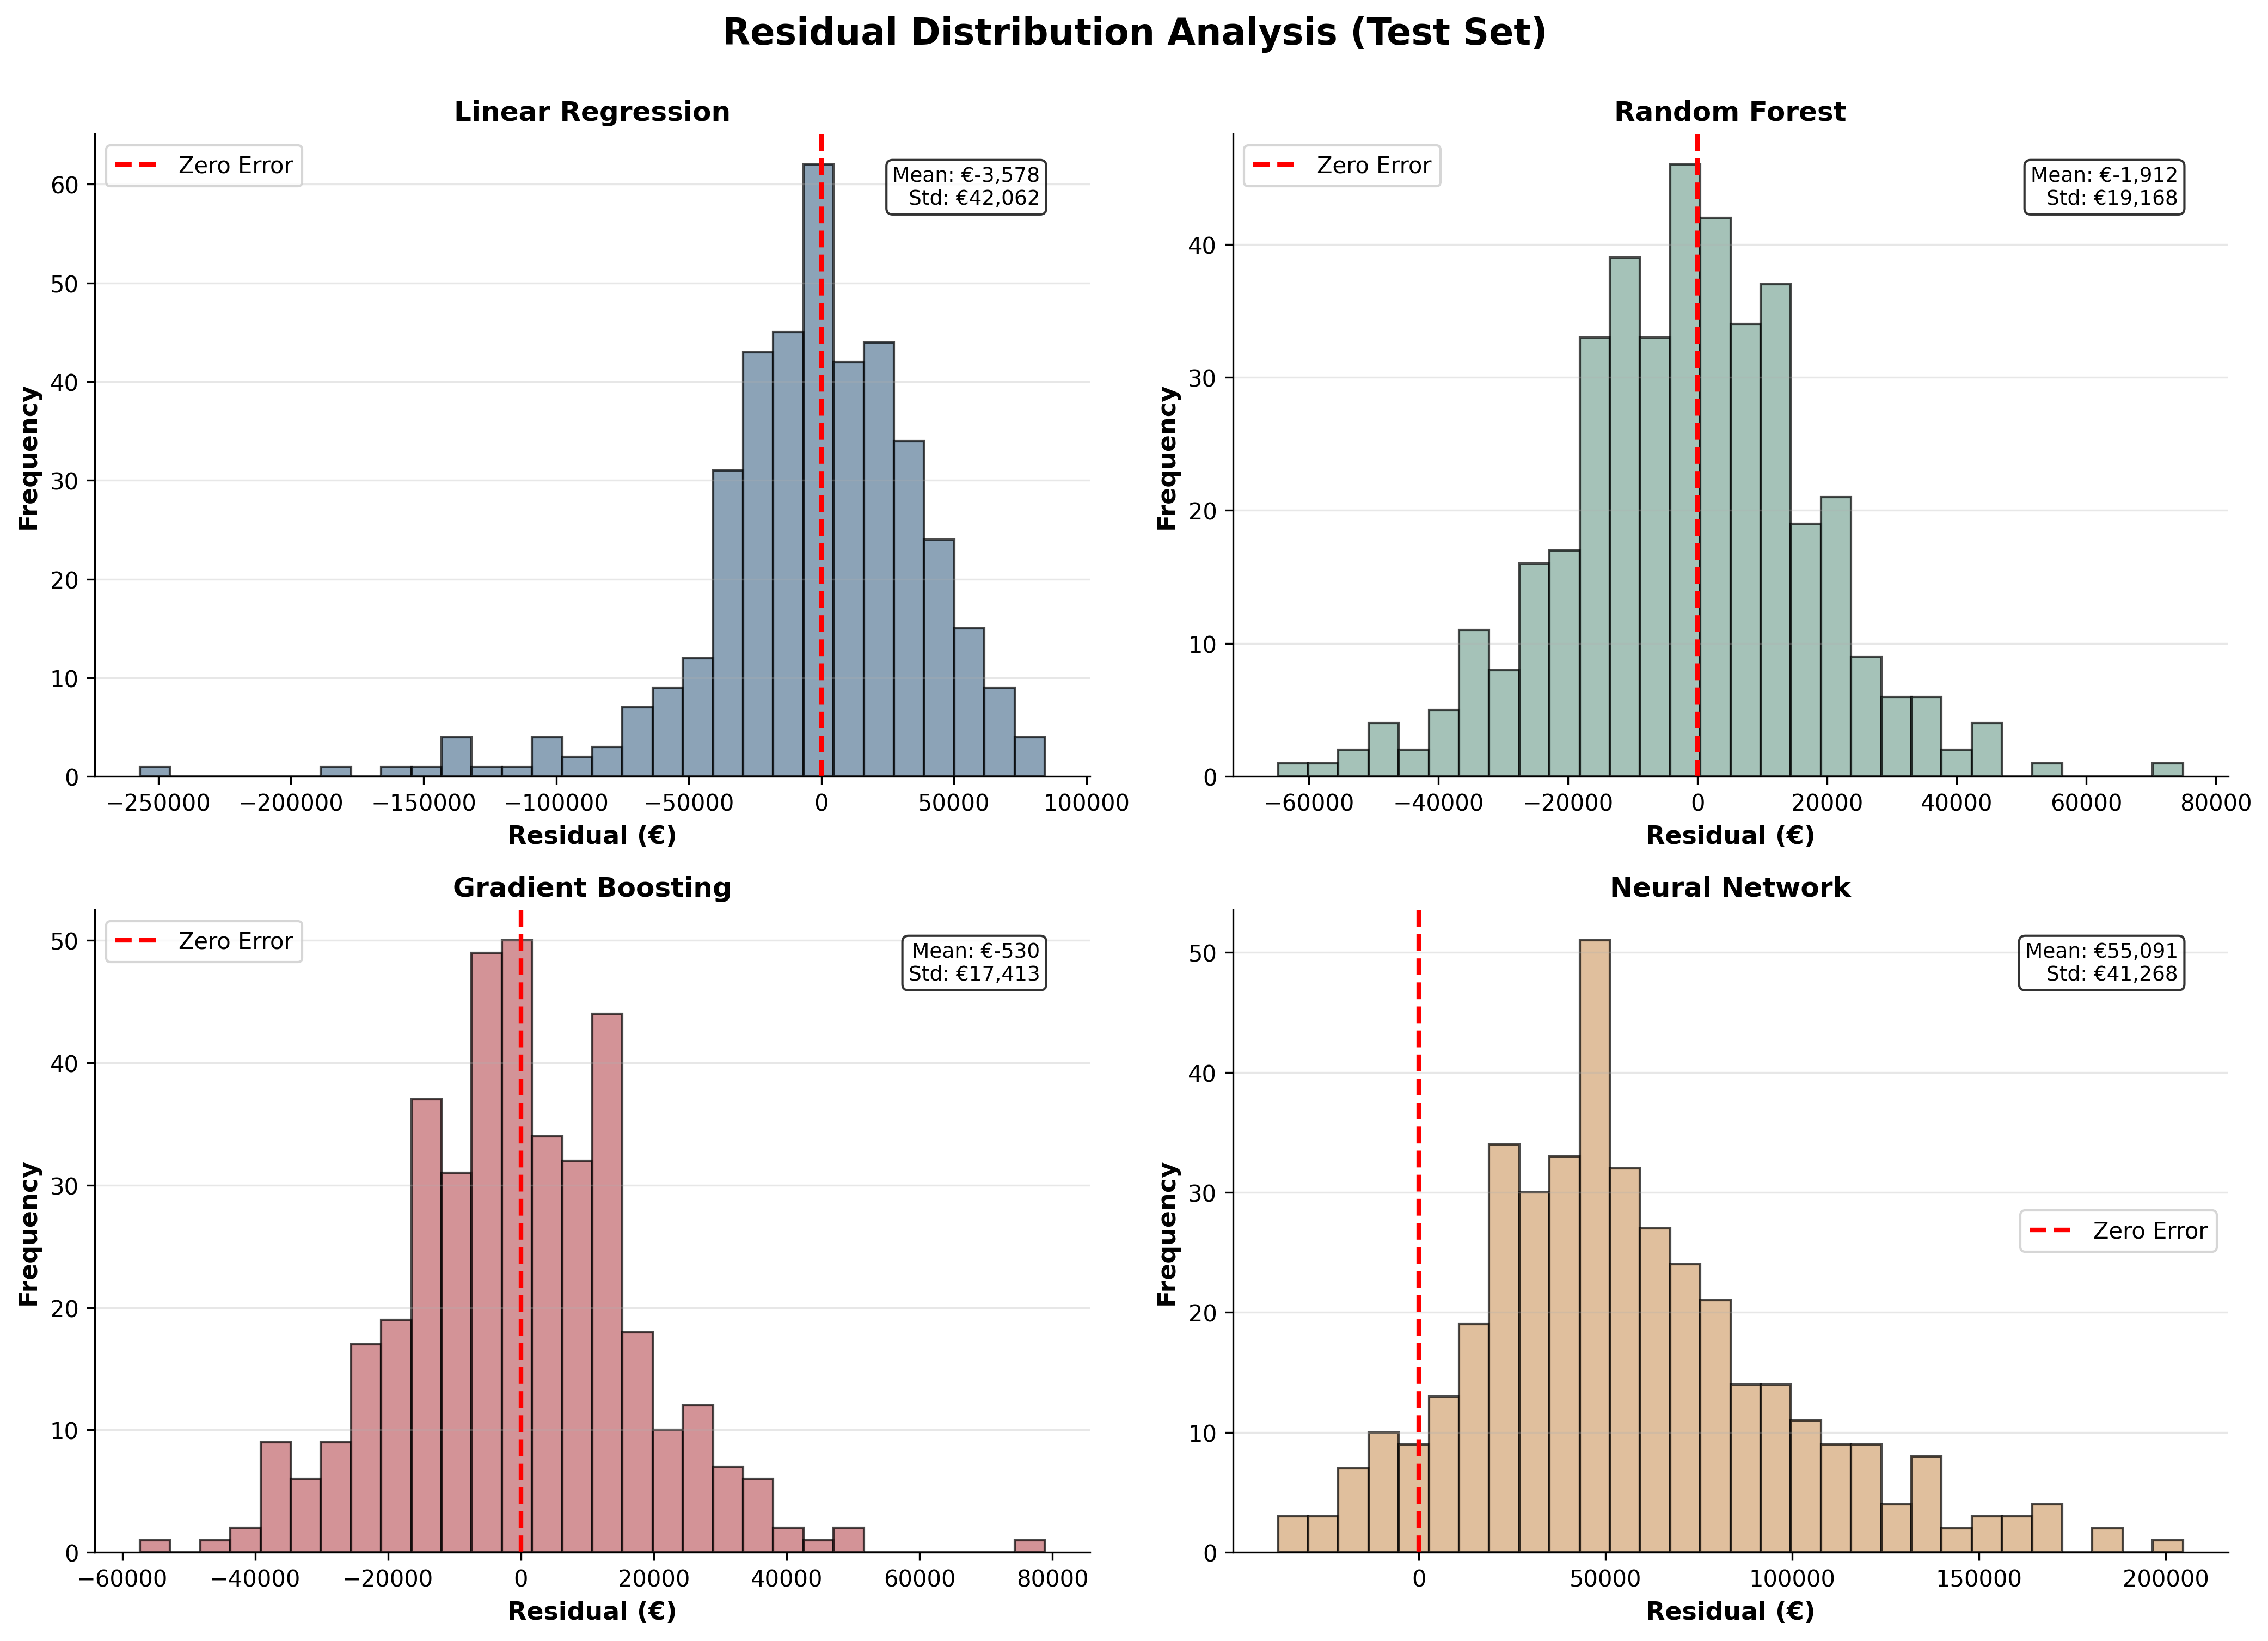

Displaying: /mnt/user-data/outputs/feature_importance_comparison.png


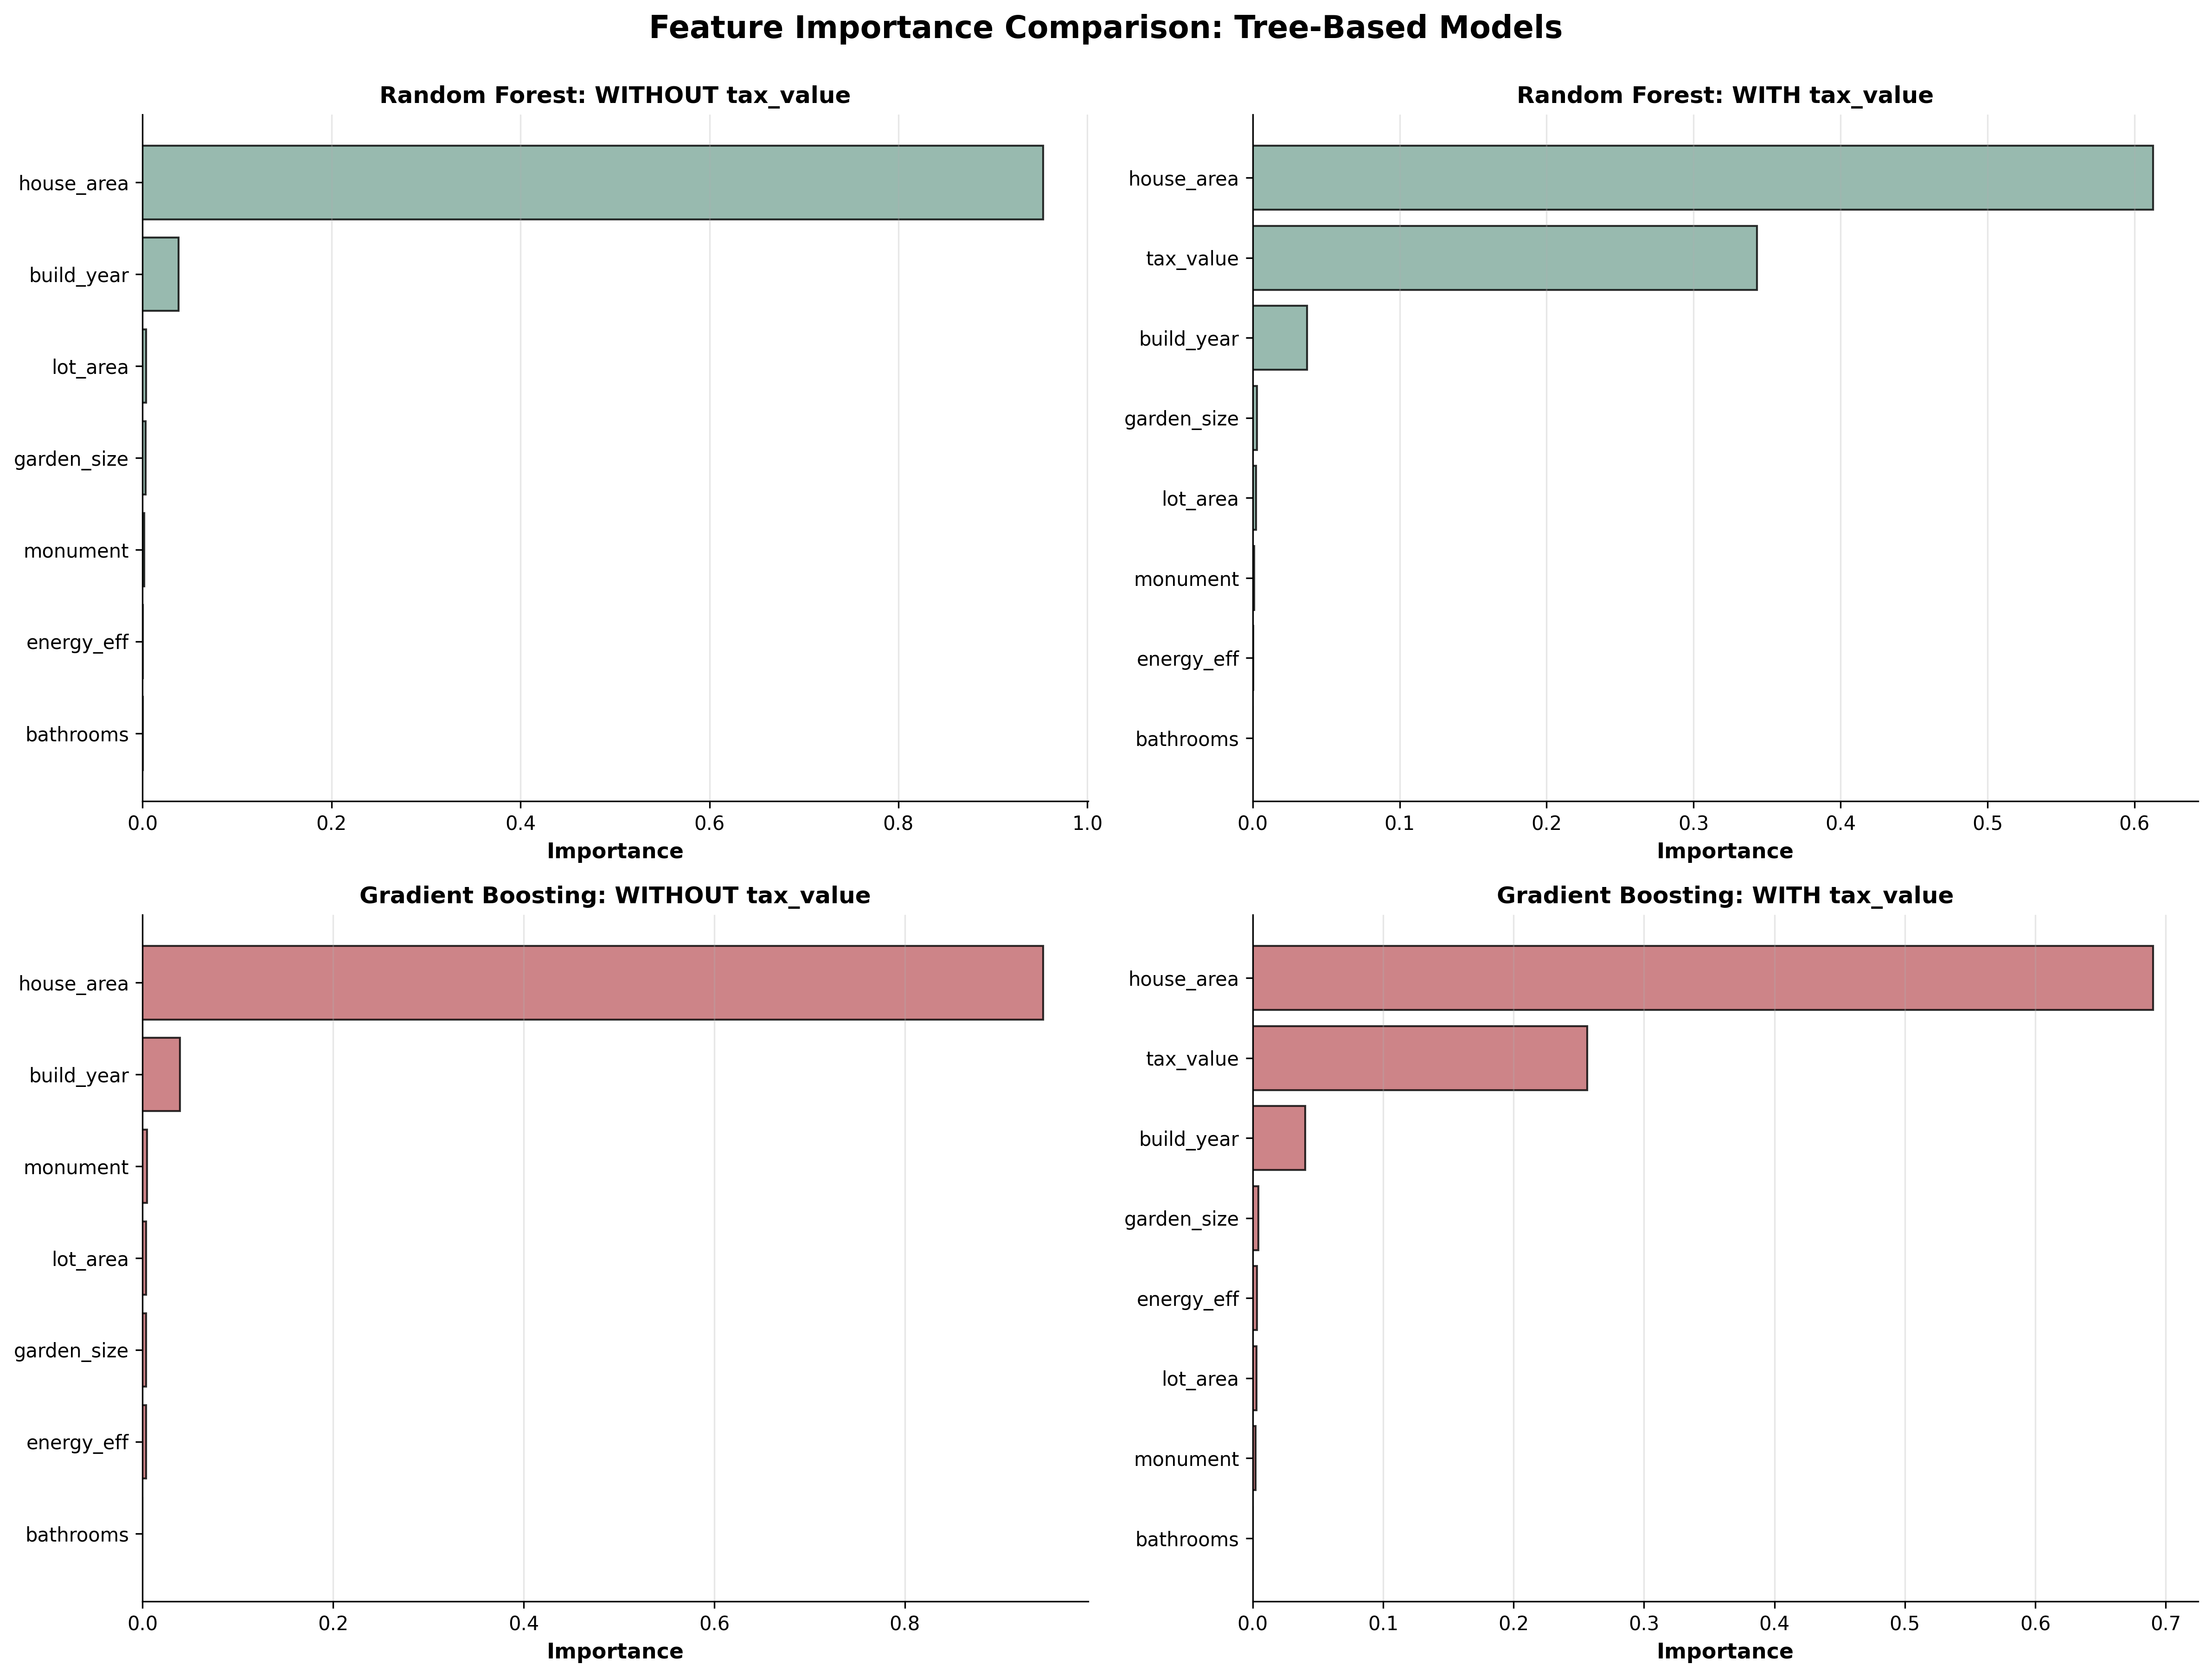

In [51]:
from IPython.display import Image, display

# List of your visualization files
files_to_present = [
    '/mnt/user-data/outputs/model_comparison_rmse.png',
    '/mnt/user-data/outputs/model_comparison_r2.png',
    '/mnt/user-data/outputs/model_comparison_rmse_mae.png',
    '/mnt/user-data/outputs/actual_vs_predicted_comparison.png',
    '/mnt/user-data/outputs/residual_distributions.png',
    '/mnt/user-data/outputs/feature_importance_comparison.png'
]

def present_images(file_list):
    for file_path in file_list:
        print(f"Displaying: {file_path}")
        try:
            display(Image(filename=file_path))
        except FileNotFoundError:
            print(f"Error: The file {file_path} was not found.")

# Run the function
present_images(files_to_present)

ERROR ANALYSIS - DETAILED INVESTIGATION

Gradient Boosting Error Statistics:
  Mean Error: €-530
  Median Error: €-1,370
  Std Error: €17,413
  Mean Absolute Error: €13,427
  Median Absolute Error: €11,164
  Mean Percentage Error: -0.13%
  Median Percentage Error: -0.21%
  95th Percentile Error: €34,970

Linear Regression Error Statistics:
  Mean Error: €-3,578
  Median Error: €-1,394
  Std Error: €42,062
  Mean Absolute Error: €30,150
  Median Absolute Error: €23,158
  Mean Percentage Error: -0.53%
  Median Percentage Error: -0.22%
  95th Percentile Error: €78,608



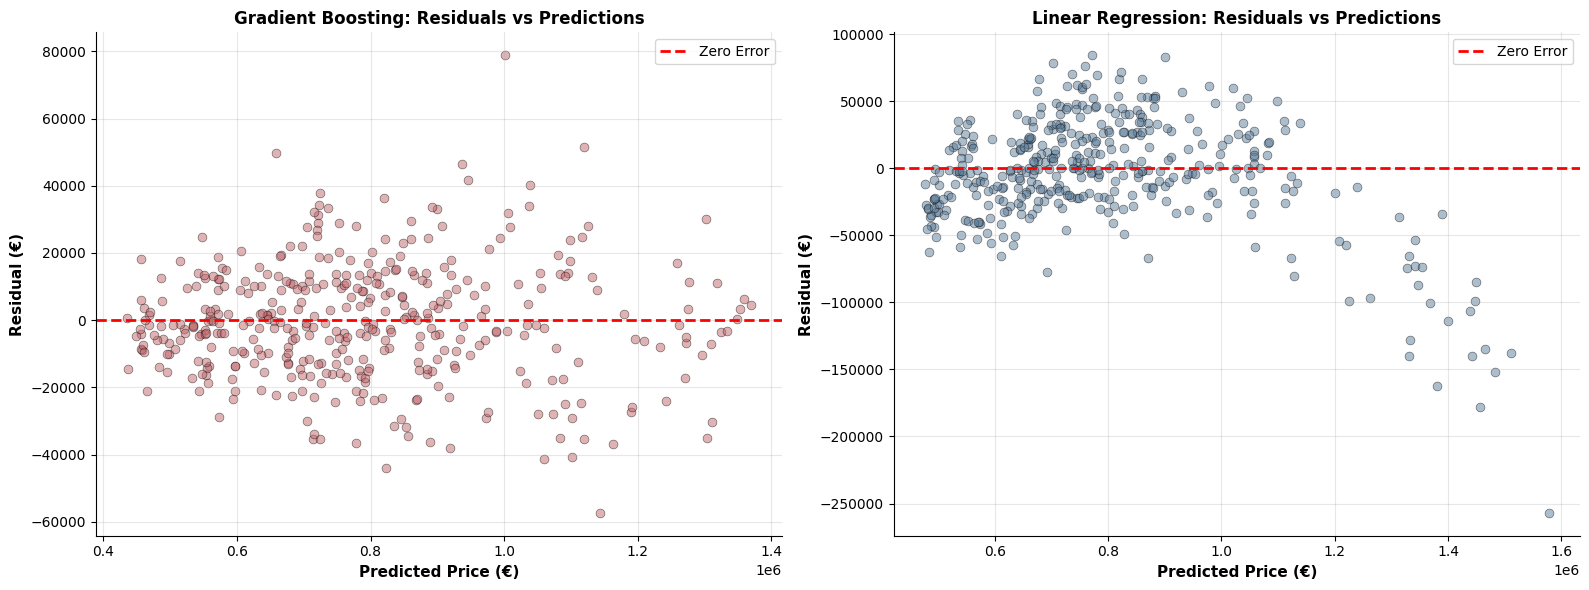

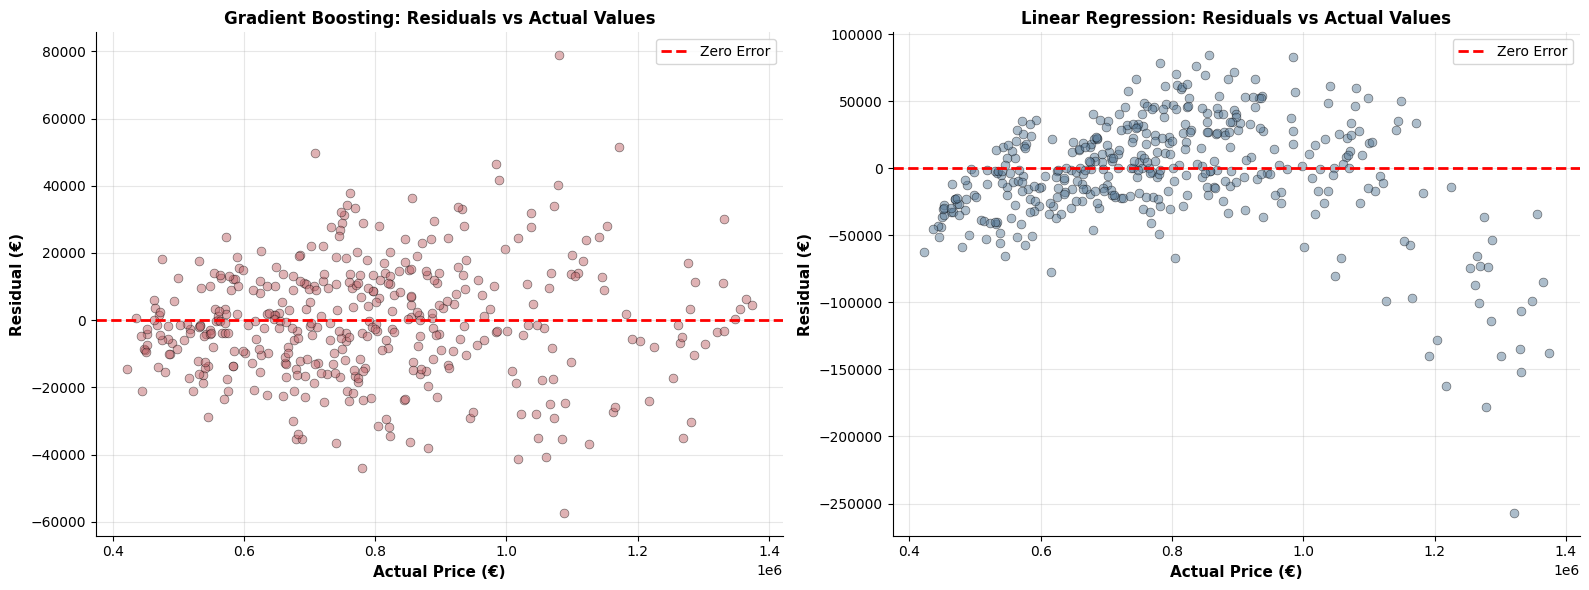

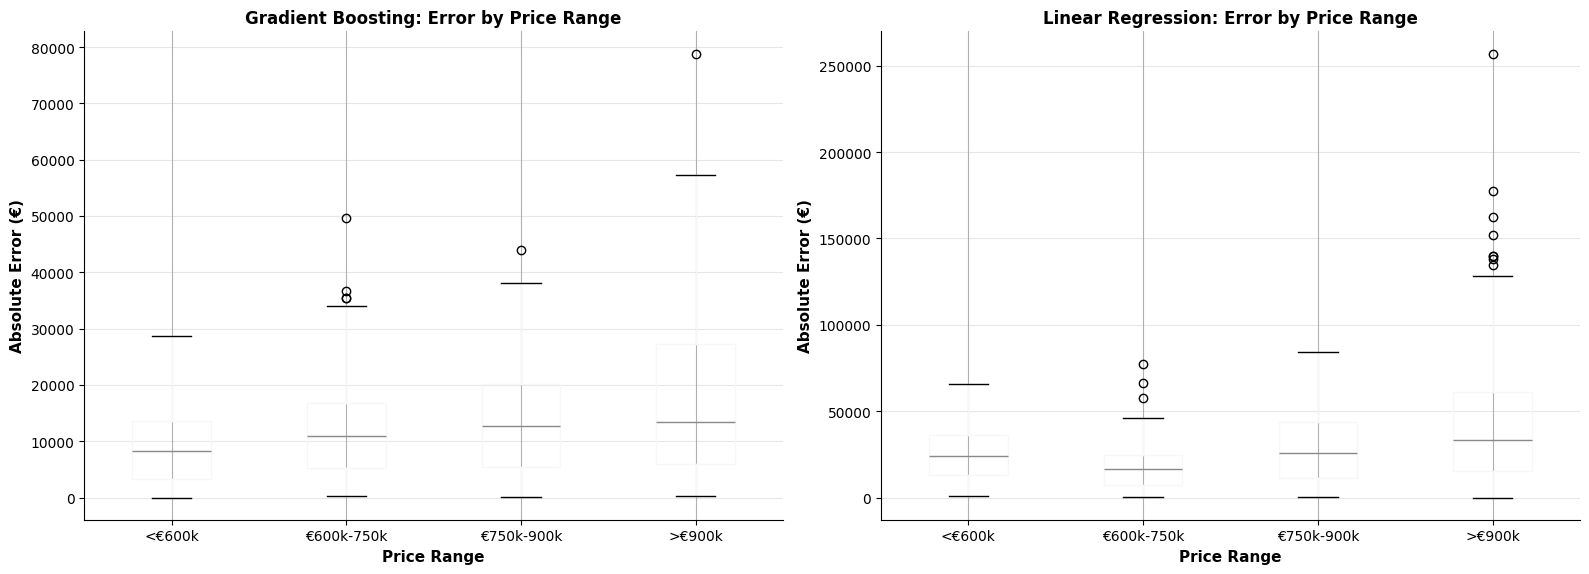

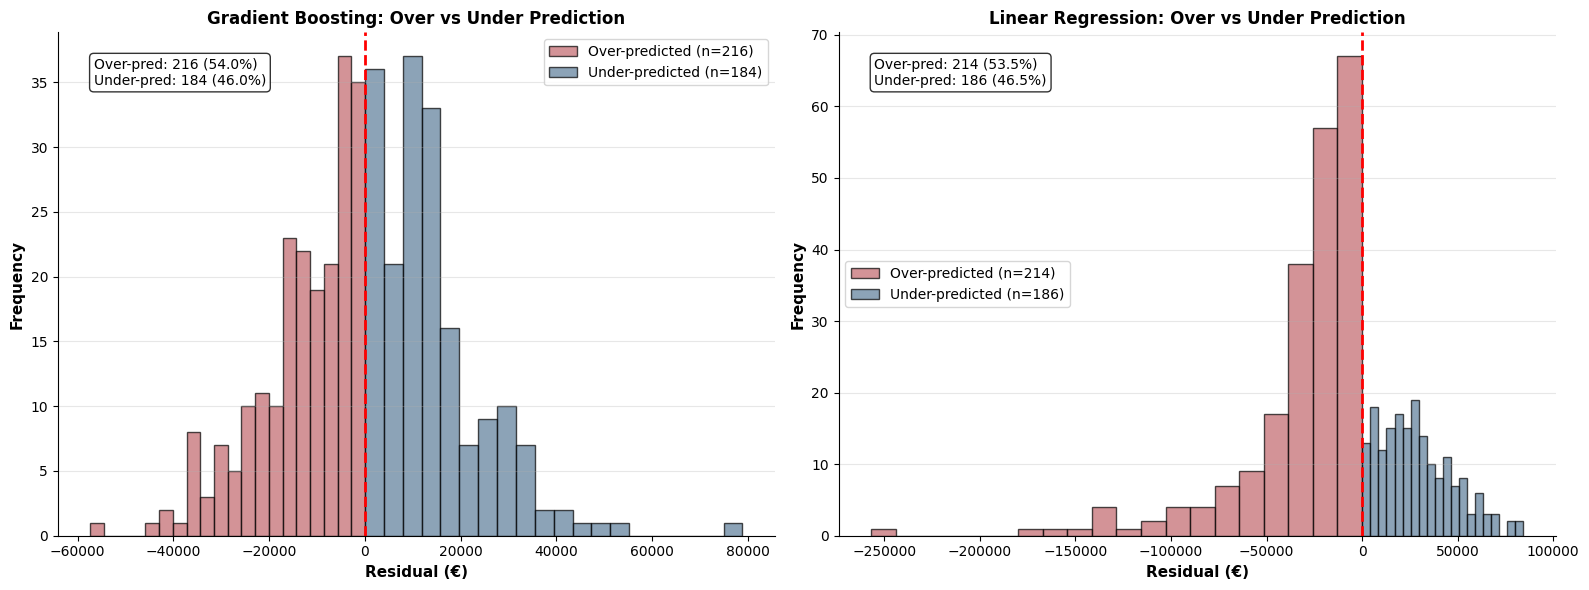


WORST PREDICTIONS ANALYSIS (Gradient Boosting)

Top 10 Worst Predictions:
Actual       Predicted    Error        % Error   
--------------------------------------------------
€ 1,080,000 € 1,001,155 €    78,845      7.3%
€ 1,087,000 € 1,144,335 €   -57,335     -5.3%
€ 1,172,000 € 1,120,396 €    51,604      4.4%
€   708,000 €   658,299 €    49,701      7.0%
€   984,000 €   937,384 €    46,616      4.7%
€   780,000 €   823,916 €   -43,916     -5.6%
€   988,000 €   946,430 €    41,570      4.2%
€ 1,018,000 € 1,059,405 €   -41,405     -4.1%
€ 1,061,000 € 1,101,798 €   -40,798     -3.8%
€ 1,079,000 € 1,038,818 €    40,182      3.7%


Feature Values for Worst Predictions:
      lot_area  house_area  garden_size  build_year  bathrooms  energy_eff  monument
1091       168         184           76        1962          2           1         1
32         143         194           40        1959          2           1         1
1916       155         198           45        1967          2       

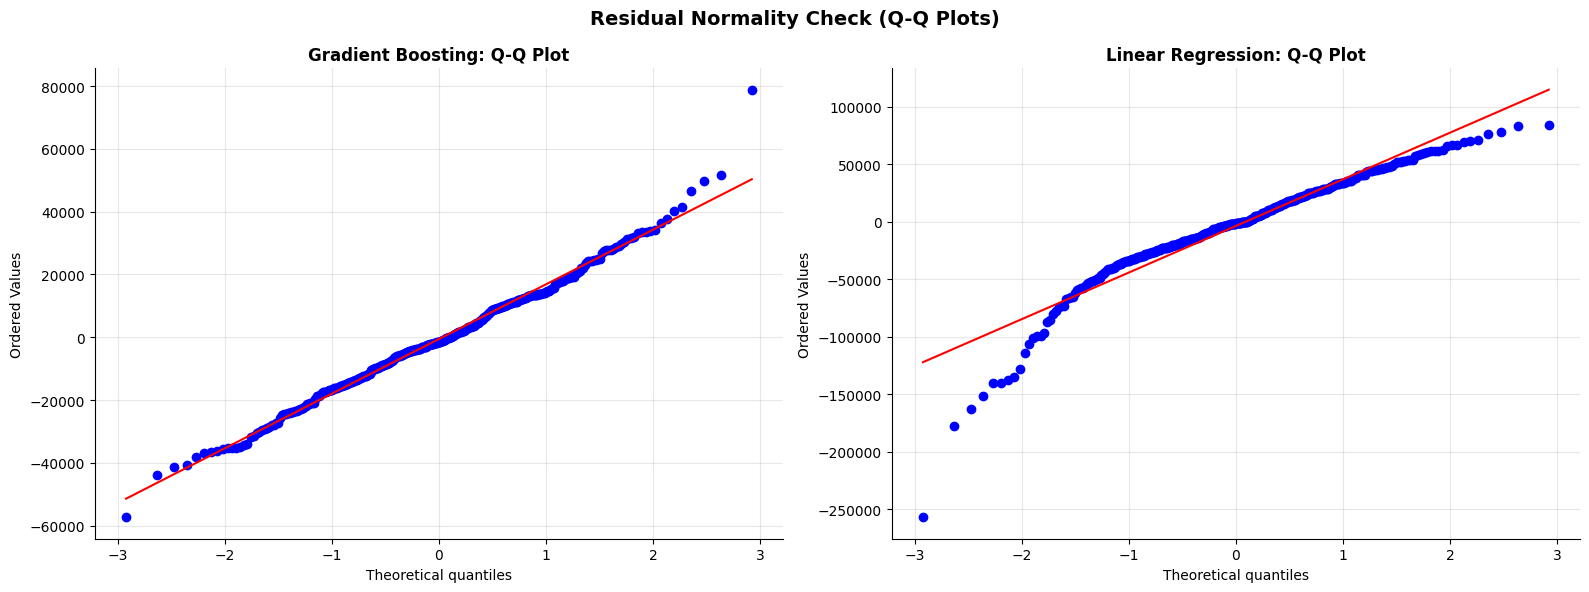

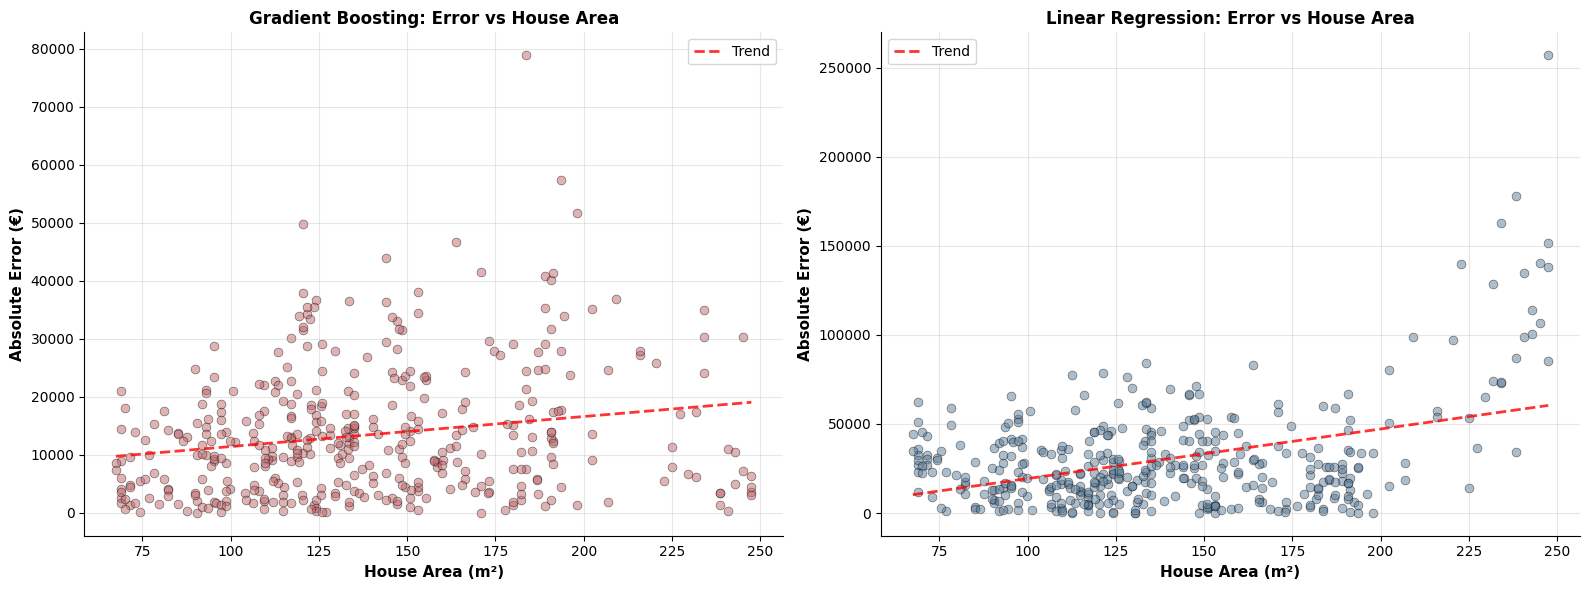


✅ Error analysis complete! All visualizations saved.


In [52]:
# Error Analysis
print("ERROR ANALYSIS - DETAILED INVESTIGATION\n")

# Focus on best model (Gradient Boosting) and baseline (Linear Regression)
models_to_analyze = {
    'Gradient Boosting': {
        'predictions': y_test_pred_gb_no_tax,
        'actual': y_test,
        'color': '#C1666B'
    },
    'Linear Regression': {
        'predictions': y_test_pred_no_tax,
        'actual': y_test,
        'color': '#5B7C99'
    }
}

# Calculate detailed error metrics for each model
error_analysis = {}

for model_name, data in models_to_analyze.items():
    residuals = data['actual'] - data['predictions']
    abs_residuals = np.abs(residuals)
    pct_errors = (residuals / data['actual']) * 100

    error_analysis[model_name] = {
        'residuals': residuals,
        'abs_residuals': abs_residuals,
        'pct_errors': pct_errors,
        'predictions': data['predictions'],
        'actual': data['actual']
    }

    print(f"{model_name} Error Statistics:")
    print(f"  Mean Error: €{residuals.mean():,.0f}")
    print(f"  Median Error: €{residuals.median():,.0f}")
    print(f"  Std Error: €{residuals.std():,.0f}")
    print(f"  Mean Absolute Error: €{abs_residuals.mean():,.0f}")
    print(f"  Median Absolute Error: €{abs_residuals.median():,.0f}")
    print(f"  Mean Percentage Error: {pct_errors.mean():.2f}%")
    print(f"  Median Percentage Error: {pct_errors.median():.2f}%")
    print(f"  95th Percentile Error: €{np.percentile(abs_residuals, 95):,.0f}")
    print()

# 1. Residuals vs Predicted Values (Heteroscedasticity Check)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for ax, (model_name, data) in zip(axes, models_to_analyze.items()):
    residuals = error_analysis[model_name]['residuals']
    predictions = error_analysis[model_name]['predictions']

    ax.scatter(predictions, residuals, alpha=0.5, s=40,
               color=data['color'], edgecolor='black', linewidth=0.5)
    ax.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
    ax.set_xlabel('Predicted Price (€)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Residual (€)', fontsize=11, fontweight='bold')
    ax.set_title(f'{model_name}: Residuals vs Predictions', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/residuals_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Residuals vs Actual Values
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for ax, (model_name, data) in zip(axes, models_to_analyze.items()):
    residuals = error_analysis[model_name]['residuals']
    actual = error_analysis[model_name]['actual']

    ax.scatter(actual, residuals, alpha=0.5, s=40,
               color=data['color'], edgecolor='black', linewidth=0.5)
    ax.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
    ax.set_xlabel('Actual Price (€)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Residual (€)', fontsize=11, fontweight='bold')
    ax.set_title(f'{model_name}: Residuals vs Actual Values', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/residuals_vs_actual.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Error Distribution by Price Range
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Define price ranges
price_bins = [0, 600000, 750000, 900000, 2000000]
price_labels = ['<€600k', '€600k-750k', '€750k-900k', '>€900k']

for ax, (model_name, data) in zip(axes, models_to_analyze.items()):
    actual = error_analysis[model_name]['actual']
    abs_residuals = error_analysis[model_name]['abs_residuals']

    # Bin the data
    price_categories = pd.cut(actual, bins=price_bins, labels=price_labels)
    error_by_price = pd.DataFrame({
        'Price Range': price_categories,
        'Absolute Error': abs_residuals
    })

    # Box plot
    error_by_price.boxplot(column='Absolute Error', by='Price Range', ax=ax)
    ax.set_xlabel('Price Range', fontsize=11, fontweight='bold')
    ax.set_ylabel('Absolute Error (€)', fontsize=11, fontweight='bold')
    ax.set_title(f'{model_name}: Error by Price Range', fontsize=12, fontweight='bold')
    ax.get_figure().suptitle('')  # Remove default title
    ax.grid(axis='y', alpha=0.3)
    ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/error_by_price_range.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Over-prediction vs Under-prediction Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for ax, (model_name, data) in zip(axes, models_to_analyze.items()):
    residuals = error_analysis[model_name]['residuals']

    over_predictions = residuals[residuals < 0]
    under_predictions = residuals[residuals > 0]

    # Create histogram
    ax.hist(over_predictions, bins=20, alpha=0.7, color='#C1666B',
            edgecolor='black', label=f'Over-predicted (n={len(over_predictions)})')
    ax.hist(under_predictions, bins=20, alpha=0.7, color='#5B7C99',
            edgecolor='black', label=f'Under-predicted (n={len(under_predictions)})')
    ax.axvline(x=0, color='red', linestyle='--', linewidth=2)
    ax.set_xlabel('Residual (€)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=11, fontweight='bold')
    ax.set_title(f'{model_name}: Over vs Under Prediction', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    ax.spines[['top', 'right']].set_visible(False)

    # Add statistics
    stats_text = f'Over-pred: {len(over_predictions)} ({len(over_predictions)/len(residuals)*100:.1f}%)\n'
    stats_text += f'Under-pred: {len(under_predictions)} ({len(under_predictions)/len(residuals)*100:.1f}%)'
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/over_under_prediction.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Identify worst predictions (outliers)
print("\nWORST PREDICTIONS ANALYSIS (Gradient Boosting)\n")

gb_residuals = error_analysis['Gradient Boosting']['residuals']
gb_abs_residuals = error_analysis['Gradient Boosting']['abs_residuals']
gb_actual = error_analysis['Gradient Boosting']['actual']
gb_predictions = error_analysis['Gradient Boosting']['predictions']

# Find top 10 worst predictions
worst_indices = gb_abs_residuals.nlargest(10).index

print("Top 10 Worst Predictions:")
print(f"{'Actual':<12} {'Predicted':<12} {'Error':<12} {'% Error':<10}")
print("-" * 50)

for idx in worst_indices:
    actual_val = gb_actual.loc[idx]
    pred_val = gb_predictions[gb_actual.index.get_loc(idx)]
    error = gb_residuals.loc[idx]
    pct_error = (error / actual_val) * 100
    print(f"€{actual_val:>10,.0f} €{pred_val:>10,.0f} €{error:>10,.0f} {pct_error:>8.1f}%")

# Get feature values for worst predictions
print("\n\nFeature Values for Worst Predictions:")
X_test_full = X_test_no_tax.loc[worst_indices]
print(X_test_full.to_string())

# 6. Q-Q Plot (Normality of Residuals)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for ax, (model_name, data) in zip(axes, models_to_analyze.items()):
    from scipy import stats
    residuals = error_analysis[model_name]['residuals']

    stats.probplot(residuals, dist="norm", plot=ax)
    ax.set_title(f'{model_name}: Q-Q Plot', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.spines[['top', 'right']].set_visible(False)

plt.suptitle('Residual Normality Check (Q-Q Plots)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/qq_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. Error by Feature Value (for house_area - most important feature)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for ax, (model_name, data) in zip(axes, models_to_analyze.items()):
    house_areas = X_test_no_tax['house_area']
    abs_residuals = error_analysis[model_name]['abs_residuals']

    ax.scatter(house_areas, abs_residuals, alpha=0.5, s=40,
               color=data['color'], edgecolor='black', linewidth=0.5)
    ax.set_xlabel('House Area (m²)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Absolute Error (€)', fontsize=11, fontweight='bold')
    ax.set_title(f'{model_name}: Error vs House Area', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.spines[['top', 'right']].set_visible(False)

    # Add trend line
    z = np.polyfit(house_areas, abs_residuals, 1)
    p = np.poly1d(z)
    ax.plot(house_areas.sort_values(), p(house_areas.sort_values()),
            "r--", linewidth=2, alpha=0.8, label=f'Trend')
    ax.legend()

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/error_vs_house_area.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Error analysis complete! All visualizations saved.")